In [212]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as snb
import tensorflow as tf
from tensorflow import keras
from scipy import stats as st
from scipy.signal  import resample
from scipy.fft import fft, fftfreq

In [213]:
# Returns wether PC os is linux or other
def isLinux():
    return os.name == 'posix'

In [221]:
data_filepath = ''

if isLinux():
    pass
else:
    data_filepath = 'C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\vpd_hep_measures.xlsx'
    data_filepath_neg_pbsx = 'C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\OPD_H2O2 _Amostras Negativas_1_a_5_em_PBS__1X.xlsx'
    data_filepath_pos_pbsx = 'C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\OPD_H2O2_Amostras_Positivas_1_5_em_PBS_1X.xlsx'
    data_filepath_neg_pbs_tween = 'C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\OPD_H2O2_Amostras_Negativas_6_a_10_em_PBS_Tween.xlsx'
    data_filepath_pos_pbs_tween = 'C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\OPD_H2O2_Amostras_Positivas_6_a_10_em_PBS_Tween.xlsx'

In [223]:
df_excel = pd.read_excel(data_filepath)
df_neg_pbsx = pd.read_excel(data_filepath_neg_pbsx)
df_pos_pbsx = pd.read_excel(data_filepath_pos_pbsx)
df_neg_pbs_tween = pd.read_excel(data_filepath_neg_pbs_tween)
df_pos_pbs_tween = pd.read_excel(data_filepath_pos_pbs_tween)

In [224]:
df_excel.head()

,pos 0 min 4.89,Unnamed: 1,neg 0min 3.14,Unnamed: 3,pos 4.89,Unnamed: 5,neg 3.31,Unnamed: 7,pos 4.89.1,Unnamed: 9,...,pos 4.6,Unnamed: 33,neg 3.12,Unnamed: 35,pos 4.17,Unnamed: 37,neg 3.13,Unnamed: 39,pos 4.9,Unnamed: 41
0,V,µA,V,µA,V,µA,V,µA,V,µA,...,V,µA,V,µA,V,µA,V,µA,V,µA
1,-0.699948,52.2196,-0.699948,62.282085,-0.699948,64.40711,-0.699948,55.21965,-0.699948,62.282085,...,-0.699948,52.594423,-0.699948,62.094688,-0.699948,61.907291,-0.699948,60.719728,-0.699948,58.219671
2,-0.689948,43.5944,-0.689948,53.157091,-0.689948,55.469513,-0.689948,47.219515,-0.689948,53.781986,...,-0.689948,43.59436,-0.689948,52.594423,-0.689948,55.094481,-0.689948,52.969456,-0.689948,50.406933
3,-0.679948,38.7819,-0.679948,49.21937,-0.679948,52.09446,-0.679948,44.219494,-0.679948,50.657034,...,-0.679948,40.531874,-0.679948,47.96958,-0.679948,52.531958,-0.679948,48.781872,-0.679948,47.469378
4,-0.669948,36.0317,-0.669948,46.906948,-0.669948,49.782038,-0.669948,42.156935,-0.669948,48.594475,...,-0.669948,37.406921,-0.669948,45.969486,-0.669948,52.031994,-0.669948,47.219515,-0.669948,45.219421


In [225]:
df_neg_pbsx.head()

,Am 1,PBS 1X,Am 2,PBS 1X.1,Am 3,PBS 1X.2,Am 4,PBS 1X.3,Am 5,PBS 1X.4,...,Am 16,Unnamed: 31,Am 17,Unnamed: 33,Am 18,Unnamed: 35,Am 19,Unnamed: 37,Am 20,Unnamed: 39
0,V,µA,V,µA,V,µA,V,µA,V,µA,...,V,µA,V,µA,V,µA,V,µA,V,µA
1,-0.700063,131.884,-0.700063,133.074,-0.700063,139.483,-0.700063,129.045,-0.700063,139.757,...,-0.700063,138.659,-0.700063,141.222,-0.700063,127.947,-0.700063,156.146,-0.700063,137.652
2,-0.690081,109.545,-0.690081,112.291,-0.690081,115.404,-0.690081,108.354,-0.690081,116.503,...,-0.690081,113.939,-0.690081,116.96,-0.690081,109.819,-0.690081,129.412,-0.690081,114.122
3,-0.680098,104.418,-0.680098,107.53,-0.680098,110.185,-0.680098,103.685,-0.680098,111.65,...,-0.680098,106.615,-0.680098,109.728,-0.680098,106.066,-0.680098,121.447,-0.680098,108.537
4,-0.670116,102.129,-0.670116,105.333,-0.670116,107.988,-0.670116,101.488,-0.670116,109.728,...,-0.670116,103.868,-0.670116,106.615,-0.670116,104.418,-0.670116,117.693,-0.670116,105.699


In [226]:
df_pos_pbsx.head()

,Am 1,PBS 1X,Am 2,PBS 1X.1,Am 3,PBS 1X.2,Am 4,PBS 1X.3,Am 5,PBS 1X.4,...,Am 16,Unnamed: 31,Am 17,Unnamed: 33,Am 18,Unnamed: 35,Am 19,Unnamed: 37,Am 20,Unnamed: 39
0,V,µA,V,µA,V,µA,V,µA,V,µA,...,V,µA,V,µA,V,µA,V,µA,V,µA
1,-0.700063,128.588,-0.700063,130.51,-0.700063,125.841,-0.700063,122.82,-0.700063,127.947,...,-0.700063,136.004,-0.700063,130.877,-0.700063,136.278,-0.700063,126.757,-0.700063,130.968
2,-0.690081,108.446,-0.690081,107.073,-0.690081,105.974,-0.690081,106.523,-0.690081,108.354,...,-0.690081,114.122,-0.690081,109.728,-0.690081,115.862,-0.690081,107.073,-0.690081,110.002
3,-0.680098,104.326,-0.680098,101.305,-0.680098,102.037,-0.680098,102.861,-0.680098,103.502,...,-0.680098,109.27,-0.680098,104.875,-0.680098,111.101,-0.680098,102.77,-0.680098,104.784
4,-0.670116,102.312,-0.670116,98.5579,-0.670116,99.8397,-0.670116,101.305,-0.670116,101.763,...,-0.670116,106.981,-0.670116,102.678,-0.670116,108.721,-0.670116,100.755,-0.670116,102.312


In [227]:
df_neg_pbs_tween.head()

,Am 6,PBSTween,Am 7,PBSTween.1,Am 8,PBSTween.2,Am 9,PBSTween.3,Am 10,PBSTween.4,Unnamed: 10,Unnamed: 11
0,V,µA,V,µA,V,µA,V,µA,V,µA,NaN,Potenc ial em V e Corrente em uA
1,-0.700063,129.045,-0.700063,132.25,-0.700063,133.623,-0.700063,137.469,-0.700063,139.941,NaN,NaN
2,-0.690081,109.728,-0.690081,110.643,-0.690081,109.911,-0.690081,112.657,-0.690081,115.679,NaN,NaN
3,-0.680098,105.699,-0.680098,105.791,-0.680098,104.326,-0.680098,107.256,-0.680098,110.368,NaN,NaN
4,-0.670116,103.96,-0.670116,103.868,-0.670116,102.129,-0.670116,105.058,-0.670116,108.08,NaN,NaN


In [228]:
df_pos_pbs_tween.head()

,Am 6,PBSTween,Am 7,PBSTween.1,Am 8,PBSTween.2,Am 9,PBSTween.3,Am 10,PBSTween.4,Unnamed: 10,Unnamed: 11
0,V,µA,V,µA,V,µA,V,µA,V,µA,NaN,Potenc ial em V e Corrente em uA
1,-0.700063,138.201,-0.700063,127.947,-0.700063,136.553,-0.700063,141.131,-0.700063,138.567,NaN,NaN
2,-0.690081,114.214,-0.690081,109.636,-0.690081,116.869,-0.690081,116.411,-0.690081,113.664,NaN,NaN
3,-0.680098,109.27,-0.680098,105.608,-0.680098,112.474,-0.680098,111.009,-0.680098,108.171,NaN,NaN
4,-0.670116,106.981,-0.670116,103.96,-0.670116,110.552,-0.670116,108.721,-0.670116,105.791,NaN,NaN


In [229]:
df_neg_pbs_tween.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)
df_pos_pbs_tween.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)

In [230]:
df_neg_pbsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Am 1         142 non-null    object
 1   PBS 1X       142 non-null    object
 2   Am 2         142 non-null    object
 3   PBS 1X.1     142 non-null    object
 4   Am 3         142 non-null    object
 5   PBS 1X.2     142 non-null    object
 6   Am 4         142 non-null    object
 7   PBS 1X.3     142 non-null    object
 8   Am 5         142 non-null    object
 9   PBS 1X.4     142 non-null    object
 10  Am 6         142 non-null    object
 11  Unnamed: 11  142 non-null    object
 12  Am 7         142 non-null    object
 13  Unnamed: 13  142 non-null    object
 14  Am 8         142 non-null    object
 15  Unnamed: 15  142 non-null    object
 16  Am 9         142 non-null    object
 17  Unnamed: 17  142 non-null    object
 18  Am 10        142 non-null    object
 19  Unnamed: 19  142 non-null    

In [231]:
df_pos_pbsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Am 1         142 non-null    object
 1   PBS 1X       142 non-null    object
 2   Am 2         142 non-null    object
 3   PBS 1X.1     142 non-null    object
 4   Am 3         142 non-null    object
 5   PBS 1X.2     142 non-null    object
 6   Am 4         142 non-null    object
 7   PBS 1X.3     142 non-null    object
 8   Am 5         142 non-null    object
 9   PBS 1X.4     142 non-null    object
 10  Am 6         142 non-null    object
 11  Unnamed: 11  142 non-null    object
 12  Am 7         142 non-null    object
 13  Unnamed: 13  142 non-null    object
 14  Am 8         142 non-null    object
 15  Unnamed: 15  142 non-null    object
 16  Am 9         142 non-null    object
 17  Unnamed: 17  142 non-null    object
 18  Am 10        142 non-null    object
 19  Unnamed: 19  142 non-null    

In [232]:
df_neg_pbs_tween.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Am 6        142 non-null    object
 1   PBSTween    142 non-null    object
 2   Am 7        142 non-null    object
 3   PBSTween.1  142 non-null    object
 4   Am 8        142 non-null    object
 5   PBSTween.2  142 non-null    object
 6   Am 9        142 non-null    object
 7   PBSTween.3  142 non-null    object
 8   Am 10       142 non-null    object
 9   PBSTween.4  142 non-null    object
dtypes: object(10)
memory usage: 11.2+ KB


In [233]:
df_pos_pbs_tween.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Am 6        142 non-null    object
 1   PBSTween    142 non-null    object
 2   Am 7        142 non-null    object
 3   PBSTween.1  142 non-null    object
 4   Am 8        142 non-null    object
 5   PBSTween.2  142 non-null    object
 6   Am 9        142 non-null    object
 7   PBSTween.3  142 non-null    object
 8   Am 10       142 non-null    object
 9   PBSTween.4  142 non-null    object
dtypes: object(10)
memory usage: 11.2+ KB


In [234]:
for col in df_excel.columns:
    if 'pos' in col:
        print("Positive: ", col)

Positive:  pos 0 min 4.89
Positive:  pos 4.89
Positive:  pos 4.89.1
Positive:  pos 4.10
Positive:  pos 4.23
Positive:  pos 4.27
Positive:  pos 4.89.2
Positive:  pos 4.94
Positive:  pos 4.6
Positive:  pos 4.17
Positive:  pos 4.9


In [235]:
for col in df_excel.columns:
    if 'neg' in col:
        print("Negative: ", col)

Negative:  neg 0min 3.14
Negative:  neg 3.31
Negative:  neg 3.2
Negative:  neg 3.4
Negative:  neg 3.5
Negative:  neg 3.6
Negative:  neg 3.9
Negative:  neg 3.10
Negative:  neg 3.12
Negative:  neg 3.13


In [236]:
potential = df_excel.iloc[1:, 2]
potential_df = potential.astype(np.float32)

In [237]:
potential_df.describe()

count    141.000000
mean       0.000062
std        0.408479
min       -0.699948
25%       -0.349943
50%        0.000062
75%        0.350068
max        0.700073
Name: neg 0min 3.14, dtype: float64

In [238]:
# Verificando se no dataset temos colunas not a number
print(df_excel.isna().any().sum())
print(df_neg_pbs_tween.isna().any().sum())
print(df_neg_pbsx.isna().any().sum())
print(df_pos_pbs_tween.isna().any().sum())
print(df_pos_pbsx.isna().any().sum())

0
0
0
0
0


In [239]:
# Verificando se há algum valor null
print(df_excel.isnull().any().sum())
print(df_neg_pbs_tween.isnull().any().sum())
print(df_neg_pbsx.isnull().any().sum())
print(df_pos_pbs_tween.isnull().any().sum())
print(df_pos_pbsx.isnull().any().sum())

0
0
0
0
0


In [240]:
positives = df_excel.iloc[1:,5::4]
negatives = df_excel.iloc[1:, 3::4]
positives_pbsx = df_pos_pbsx.iloc[11:, 1::2]
positives_pbs_tween = df_pos_pbs_tween.iloc[11:, 1::2]
negatives_pbsx = df_neg_pbsx.iloc[11:, 1::2]
negatives_pbs_tween = df_neg_pbs_tween.iloc[11:, 1::2]

In [241]:
positives.head()

,Unnamed: 5,Unnamed: 9,Unnamed: 13,Unnamed: 17,Unnamed: 21,Unnamed: 25,Unnamed: 29,Unnamed: 33,Unnamed: 37,Unnamed: 41
1,64.40711,62.282085,64.969778,53.03216,52.282095,57.657003,50.15707,52.594423,61.907291,58.219671
2,55.469513,53.781986,60.657263,44.531822,43.469429,47.157049,40.469408,43.59436,55.094481,50.406933
3,52.09446,50.657034,59.157133,41.781902,41.156769,43.031931,37.031889,40.531874,52.531958,47.469378
4,49.782038,48.594475,61.282158,39.531946,38.969278,40.594339,34.281731,37.406921,52.031994,45.219421
5,50.344467,48.407078,64.969778,38.906813,37.969351,39.90674,33.156633,36.844254,53.594589,45.406818


In [242]:
negatives.head()

,Unnamed: 3,Unnamed: 7,Unnamed: 11,Unnamed: 15,Unnamed: 19,Unnamed: 23,Unnamed: 27,Unnamed: 31,Unnamed: 35,Unnamed: 39
1,62.282085,55.21965,59.032202,68.344831,61.782122,63.782215,64.53228,62.844753,62.094688,60.719728
2,53.157091,47.219515,49.719572,59.094667,52.531958,55.094481,60.344696,55.657148,52.594423,52.969456
3,49.21937,44.219494,46.219349,54.969549,49.21937,50.969601,58.594704,50.969601,47.96958,48.781872
4,46.906948,42.156935,44.094324,52.282095,46.531916,48.65694,60.032129,48.719406,45.969486,47.219515
5,46.219349,41.094303,42.594433,51.594496,44.781923,46.594381,63.094616,47.719479,45.844316,45.907021


In [243]:
positives_pbs_tween.head()

,PBSTween,PBSTween.1,PBSTween.2,PBSTween.3,PBSTween.4
11,104.129,102.38,108.917,105.612,102.6
12,103.891,102.051,108.844,105.347,102.362
13,103.708,101.657,108.707,105.127,102.133
14,103.561,101.263,108.432,104.935,101.959
15,103.433,100.897,108.02,104.788,101.785


In [244]:
positives_pbsx.head()

,PBS 1X,PBS 1X.1,PBS 1X.2,PBS 1X.3,PBS 1X.4,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37,Unnamed: 39
11,99.9542,94.168,95.6786,99.5972,97.7386,105.521,98.9654,100.851,99.4324,98.0133,99.6338,99.1302,103.635,100.787,102.069,103.598,98.6633,106.043,97.6104,98.1872
12,99.7894,93.8659,95.404,99.3042,97.2808,105.383,98.6908,100.458,99.0936,97.7936,99.5148,99.1302,103.452,100.485,101.904,103.442,98.3337,106.006,97.3724,97.876
13,99.6521,93.637,95.2026,98.9929,96.9421,105.319,98.4436,100.156,98.8281,97.647,99.4049,99.0844,103.369,100.247,101.813,103.369,98.1048,106.033,97.2167,97.6013
14,99.4598,93.4539,95.0561,98.6358,96.6583,105.31,98.2513,99.881,98.5626,97.5463,99.1119,98.9105,103.342,100.064,101.813,103.378,97.94,105.942,97.116,97.3632
15,99.2584,93.3349,94.9371,98.3154,96.4477,105.31,98.1231,99.6704,98.3886,97.5006,98.7549,98.6725,103.369,99.9359,101.895,103.397,97.821,105.74,97.0703,97.1984


In [245]:
negatives_pbs_tween.head()

,PBSTween,PBSTween.1,PBSTween.2,PBSTween.3,PBSTween.4
11,102.087,101.135,98.8281,101.895,104.926
12,101.978,100.961,98.5626,101.639,104.642
13,101.923,100.879,98.4161,101.419,104.431
14,101.822,100.851,97.9767,101.208,104.266
15,101.639,100.87,98.0133,101.053,104.12


In [246]:
negatives_pbsx.head()

,PBS 1X,PBS 1X.1,PBS 1X.2,PBS 1X.3,PBS 1X.4,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37,Unnamed: 39
11,99.3866,102.948,105.264,98.0957,107.929,103.287,97.647,96.5118,97.3449,118.1,101.73,101.556,102.646,99.5056,100.311,100.531,103.049,101.804,112.955,101.584
12,99.1577,102.783,105.045,97.8302,107.828,103.012,97.2717,96.3287,97.116,117.844,101.547,101.245,102.399,99.2859,99.8993,100.266,102.866,101.538,112.497,101.364
13,98.9837,102.683,104.898,97.6287,107.736,102.774,97.052,96.1822,96.9512,117.588,101.382,100.998,102.197,99.1028,99.6979,100.082,102.719,101.282,112.232,101.19
14,98.8556,102.618,104.779,97.4548,107.727,102.6,96.9055,96.0723,96.8414,117.258,101.245,100.778,102.033,98.9654,99.5331,99.9176,102.609,101.089,111.994,101.071
15,98.7457,102.637,104.752,97.3358,107.736,102.481,96.7865,95.9808,96.7773,116.965,101.117,100.632,101.923,98.8556,99.4415,99.7711,102.564,100.906,111.801,100.989


In [247]:
# Transformando os valores para float
positives_pbs_tween = positives_pbs_tween.astype(np.float32)
positives_pbsx = positives_pbsx.astype(np.float32)
negatives_pbs_tween = negatives_pbs_tween.astype(np.float32)
negatives_pbsx = negatives_pbsx.astype(np.float32)

In [248]:
positives_pbsx.describe()

,PBS 1X,PBS 1X.1,PBS 1X.2,PBS 1X.3,PBS 1X.4,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37,Unnamed: 39
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,102.107956,97.660118,100.250732,103.359543,100.723885,110.235336,102.721817,103.428505,102.244682,102.029350,103.671684,103.102570,109.604004,104.006096,105.053017,108.108665,101.770065,109.978287,100.295174,100.267738
std,4.973717,5.954548,6.809216,6.475861,5.950542,7.297883,7.051920,6.357247,6.519381,7.218783,7.025475,6.543472,7.539724,6.618632,6.086168,7.011136,6.312831,6.574543,6.029781,5.558972
min,96.868797,90.752998,92.574997,95.715302,94.149696,102.737000,96.063202,97.656197,96.392799,95.111000,96.154701,96.722397,100.375000,97.775200,98.608398,100.713997,95.660301,103.021004,94.195503,95.111000
25%,97.930901,92.762650,93.929951,97.422749,95.660301,104.257000,96.983299,98.699951,97.422749,95.925850,97.642498,97.340351,103.433502,98.580952,100.164501,101.936497,96.763550,104.166000,95.367401,96.017403
50%,100.686996,96.081497,99.560501,101.949997,98.855598,107.140999,98.251297,99.587997,98.388603,97.967499,101.236000,100.475998,108.019997,100.200996,102.141998,105.657997,97.940002,107.709000,97.115997,97.198402
75%,104.494999,101.542999,105.044498,107.429501,104.596001,114.699001,107.539001,108.436501,107.278500,106.395000,108.285500,107.063499,114.250500,107.736500,108.409500,112.854000,106.024002,114.273499,104.316998,104.513500
max,116.178001,113.448997,116.855003,119.245003,116.653999,128.162003,119.693001,120.984001,120.078003,120.014000,119.940002,119.042999,128.153000,120.141998,120.563004,123.657997,117.121002,125.002998,114.777000,115.235001


In [249]:
negatives_pbsx.describe()

,PBS 1X,PBS 1X.1,PBS 1X.2,PBS 1X.3,PBS 1X.4,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37,Unnamed: 39
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,101.339081,106.393532,109.279358,102.040955,110.676895,105.081261,98.291336,97.901939,98.563133,120.505997,103.411621,102.282387,104.672966,100.848175,102.089577,101.791656,104.511230,104.405144,113.880356,103.348907
std,4.780757,6.094128,6.499352,6.738184,5.093083,3.745708,2.763119,3.352647,3.195072,5.028511,4.082871,3.177998,3.935103,3.691844,4.025648,3.744774,3.755638,4.547823,4.238844,3.890298
min,96.557602,99.752800,102.014000,94.753998,105.063004,101.208000,95.587097,94.277901,95.321602,115.462997,98.956299,99.185204,100.741997,96.813904,98.187202,98.013298,100.640999,99.990799,109.685997,99.533096
25%,98.059048,101.428001,103.804501,96.342449,106.431499,102.384998,96.388199,95.385651,96.145550,116.141003,100.403000,100.123501,101.821999,98.434402,99.162251,99.038651,101.689499,100.365997,111.005001,100.476002
50%,99.038696,104.202003,107.461998,100.585999,108.514999,103.012001,96.905502,96.172997,96.951202,118.264999,101.263000,100.540001,102.399002,99.020401,99.899300,99.917603,102.544998,102.966003,111.801003,101.363998
75%,103.584499,109.970501,113.133503,105.983002,113.980000,107.864502,100.224499,100.036449,100.842499,123.721500,106.046997,104.897999,107.498001,102.971001,104.971500,103.909500,107.471001,107.539497,116.982998,105.759003
max,116.287003,123.501999,126.907997,120.727997,123.291000,113.806000,105.904999,106.427002,106.262001,132.432999,114.191002,110.766998,113.988998,109.924004,112.725998,111.609001,114.694000,116.594002,125.736000,113.045998


In [250]:
positives_pbs_tween.describe()

,PBSTween,PBSTween.1,PBSTween.2,PBSTween.3,PBSTween.4
count,131.000000,131.000000,131.000000,131.000000,131.000000
mean,105.582802,104.065163,110.909203,106.401367,103.155922
std,5.058843,5.023359,5.875426,4.682737,4.664548
min,100.412003,98.324600,104.210999,101.621002,98.654198
25%,101.996002,100.032051,106.097500,103.021500,99.963352
50%,103.670998,102.445000,109.064003,104.916000,101.675003
75%,108.112000,106.674000,113.998501,108.862499,104.985001
max,121.542999,117.394997,127.127998,121.294998,118.595001


In [251]:
negatives_pbs_tween.describe()

,PBSTween,PBSTween.1,PBSTween.2,PBSTween.3,PBSTween.4
count,131.000000,131.000000,131.000000,131.000000,131.000000
mean,103.688217,102.828308,99.082886,102.066055,105.431404
std,5.227013,5.012250,4.419894,4.865469,4.769473
min,98.086502,97.271698,94.845497,97.528000,100.796997
25%,99.514797,98.910503,96.140999,98.823551,102.096500
50%,101.977997,101.135002,97.702003,100.650002,103.900002
75%,106.252998,105.369999,100.841999,103.931999,107.951500
max,118.485001,117.276001,113.541000,118.255997,120.856003


In [252]:
potential_hdv = df_neg_pbs_tween.iloc[11:,0]
potential_hdv = potential_hdv.astype(np.float32)

In [253]:
# Transformando os positivos e negativos em float
positives_df = positives.astype(np.float32)
negatives_df = negatives.astype(np.float32)

In [254]:
positives_df.describe()

,Unnamed: 5,Unnamed: 9,Unnamed: 13,Unnamed: 17,Unnamed: 21,Unnamed: 25,Unnamed: 29,Unnamed: 33,Unnamed: 37,Unnamed: 41
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,57.348587,55.370586,55.955711,47.686943,47.436497,51.489014,46.037643,49.682873,57.120964,53.657890
std,12.202006,11.161823,13.231521,13.436898,14.288779,14.618992,15.399408,15.540482,15.575661,16.222013
min,40.453743,40.209984,37.284946,30.084824,29.247332,34.078644,27.416039,31.372356,39.459969,35.672424
25%,46.860100,45.572567,44.228790,35.641171,35.547424,38.969276,32.628632,36.897446,44.585060,40.572502
50%,55.285217,54.616451,53.753948,45.916321,45.335079,49.485134,45.122551,47.416351,53.416443,49.822639
75%,66.485382,62.360336,64.969780,56.003975,56.297729,58.772778,54.372715,57.454014,65.422867,61.529064
max,86.554459,86.473206,90.523270,85.848190,90.967010,97.910881,92.292046,98.373390,110.498573,110.667328


In [255]:
negatives_df.describe()

,Unnamed: 3,Unnamed: 7,Unnamed: 11,Unnamed: 15,Unnamed: 19,Unnamed: 23,Unnamed: 27,Unnamed: 31,Unnamed: 35,Unnamed: 39
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,54.940765,50.000107,53.841366,59.348785,56.237560,55.570103,57.872967,58.942280,57.096931,56.249943
std,11.761581,13.304927,13.617917,11.098723,12.366553,11.318823,15.140470,14.952596,15.052420,12.598386
min,40.041233,32.053612,36.009933,44.085049,39.109970,40.728737,37.528706,41.522503,38.553715,41.166260
25%,45.285057,38.066196,42.416264,49.991394,45.156956,45.885086,44.278812,47.719479,44.997574,45.907021
50%,52.666428,48.760128,51.841427,57.804012,54.522705,53.735184,55.703972,55.657150,54.691460,53.835201
75%,61.310314,58.522774,61.610317,66.691635,63.391590,62.847828,68.704178,66.160393,64.110352,62.379074
max,94.442055,82.166885,94.660828,89.191986,92.135788,88.779472,100.220200,112.473587,105.679749,98.348381


In [256]:
def saveJson(status, number, data):
    filename = f"C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\JSON\\Hep\\{status}_{number}.json"
    file = open(filename, 'w') 
    file.write(data) 
    file.close() 

In [257]:
# Salvando os dados em Json formato
import json
# Percorrendo a coluna dos valores positivos
for i in range(positives_df.shape[1]):
    
    read_current = positives_df.iloc[:,i].values
    jsonList = []
    sum = 0
    
    for j in range(read_current.shape[0]):
        c = read_current[j]
        v = potential_df.values[j]
   
        jsonList.append(json.dumps({'V': str(v), 'I': str(c)}, indent=2))
        sum += 1
        
    print(f"Lines Json: {sum}")
    
    jsonObject = json.dumps({'readings': jsonList})
    saveJson("pos", i, jsonObject)
    
for i in range(negatives_df.shape[1]):
    
    read_current = negatives_df.iloc[:,i].values   
    jsonList = []
    sum = 0
    
    for j in range(read_current.shape[0]):
        c = read_current[j]
        v = potential_df.values[j]
   
        jsonList.append(json.dumps({'V': str(v), 'I': str(c)}, indent=2))
        sum += 1
    
    print(f"Lines Json: {sum}")
    jsonObject = json.dumps({'readings': jsonList})
    saveJson("neg", i, jsonObject)
    
    

Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141


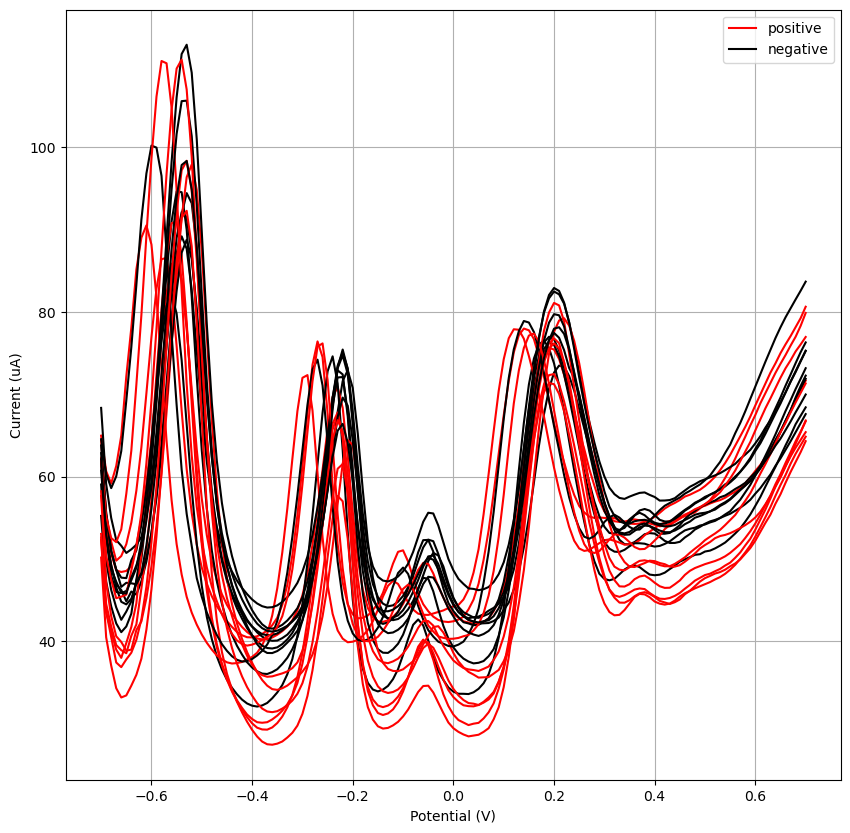

In [258]:
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_df, positive, color = 'r', label = 'positive')
        plt.plot(potential_df, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_df, positive, color = 'r')
        plt.plot(potential_df, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

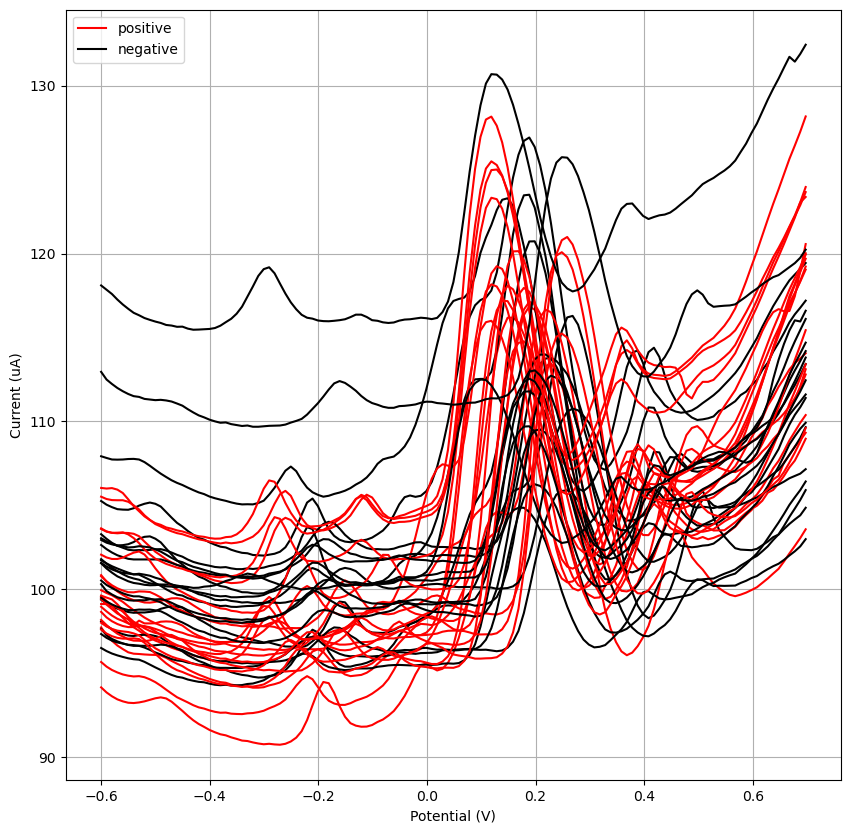

In [259]:
# plotando os dados das análises novas para o PBSX
plt.figure(figsize=(10,10))
for i in range(positives_pbsx.shape[1]):
    positive = positives_pbsx.iloc[:,i]
    negative = negatives_pbsx.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_hdv, positive, color = 'r', label = 'positive')
        plt.plot(potential_hdv, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_hdv, positive, color = 'r')
        plt.plot(potential_hdv, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

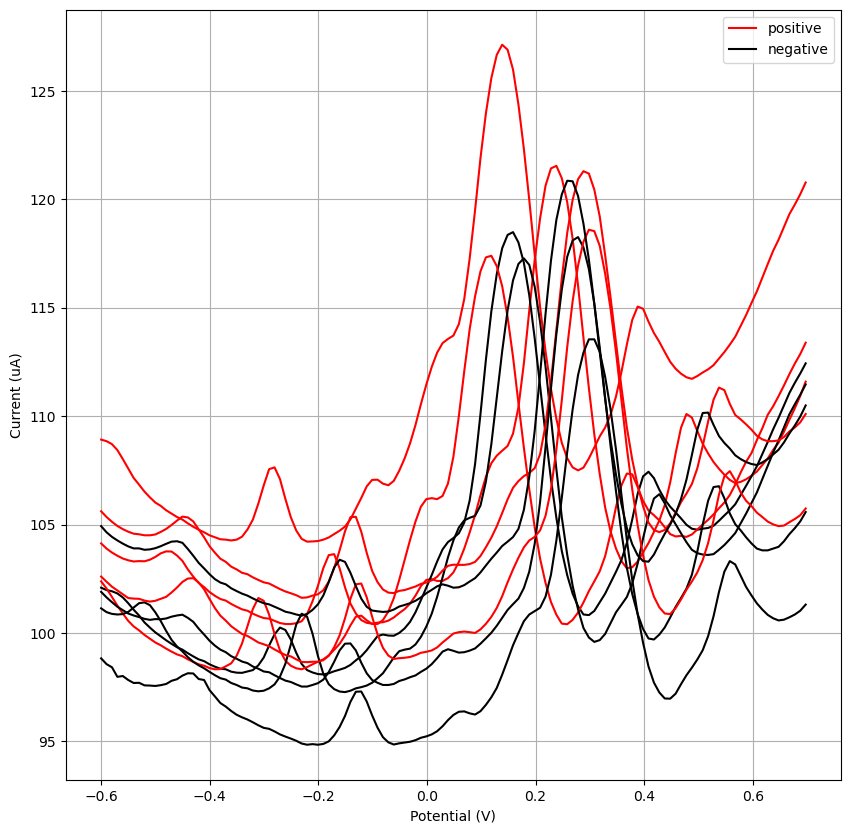

In [260]:
# plotando os dados das análises novas para o PBS Tween
plt.figure(figsize=(10,10))
for i in range(positives_pbs_tween.shape[1]):
    positive = positives_pbs_tween.iloc[:,i]
    negative = negatives_pbs_tween.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_hdv, positive, color = 'r', label = 'positive')
        plt.plot(potential_hdv, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_hdv, positive, color = 'r')
        plt.plot(potential_hdv, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

In [261]:
#Calculando o tempo
Ei = potential.values[0]
Ef = potential.values[len(potential) - 1]
Sr = 0.01
# Number of sample points
N = positives_df.shape[0]
T = (Ef - Ei) / Sr
t = np.linspace(0, T, N)
dt = np.diff(t)[0]
print(f'Tempo total = {T} s')
print(f'Number of Samples = {N} s')
print(f'E inicial = {Ei} s')
print(f'E final = {Ef} s')
print(f'dt = {dt}')


Tempo total = 140.00215530395508 s
Number of Samples = 141 s
E inicial = -0.6999483108520508 s
E final = 0.7000732421875 s
dt = 1.0000153950282507


In [262]:
#Calculando o tempo
Ei = potential_hdv.values[0]
Ef = potential_hdv.values[len(potential_hdv) - 1]
Sr = 0.01
# Number of sample points
N = positives_pbsx.shape[0]
T = (Ef - Ei) / Sr
t = np.linspace(0, T, N)
dt = np.diff(t)[0]
print(f'Tempo total = {T} s')
print(f'Number of Samples = {N} s')
print(f'E inicial = {Ei} s')
print(f'E final = {Ef} s')
print(f'dt = {dt}')

Tempo total = 129.7692060470581 s
Number of Samples = 131 s
E inicial = -0.6002399921417236 s
E final = 0.6974520087242126 s
dt = 0.998224661900447


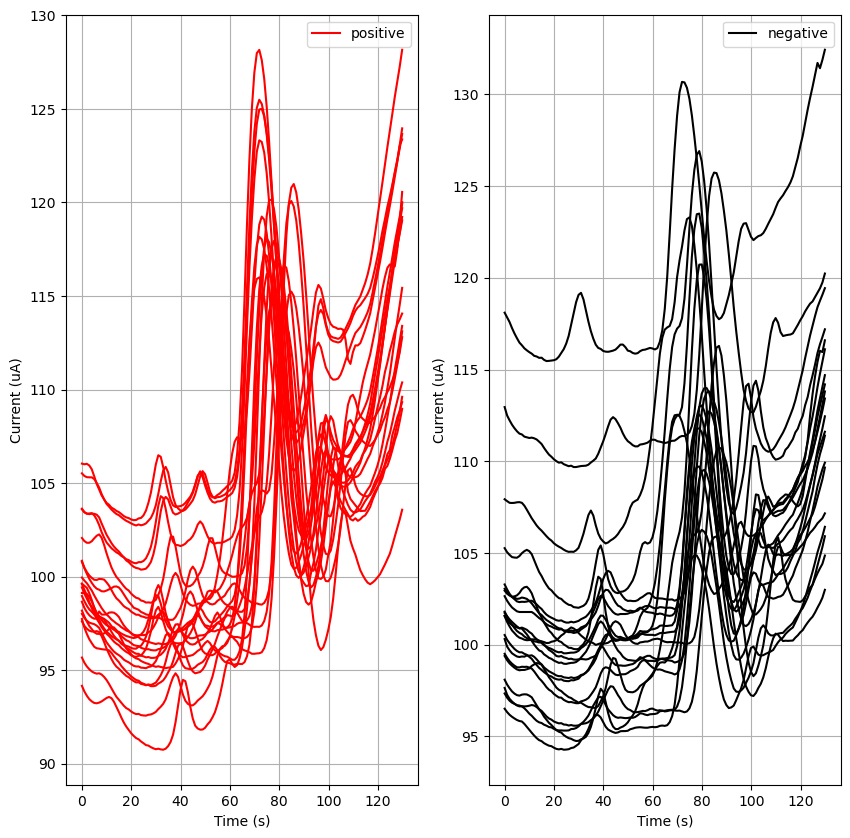

In [263]:
# Plotando as curvas em função do tempo
# plotando todos os positivos como vermelho e todos os negativos em preto
# PBSx
fig, (ax0, ax1) = plt.subplots(figsize = (10,10), ncols=2, nrows=1)
for i in range(positives_pbsx.shape[1]):
    positive = positives_pbsx.iloc[:,i]
    negative = negatives_pbsx.iloc[:,i]
    if (i == 0 ):
        ax0.plot(t, positive, color = 'r', label = 'positive')
        ax1.plot(t, negative, color = 'black', label = 'negative')
    else:
        ax0.plot(t, positive, color = 'r')
        ax1.plot(t, negative, color = 'black') 
ax0.set_ylabel('Current (uA)')
ax0.set_xlabel('Time (s)')
ax0.legend()
ax0.grid()

ax1.set_ylabel('Current (uA)')
ax1.set_xlabel('Time (s)')
ax1.legend()
ax1.grid()

plt.show()

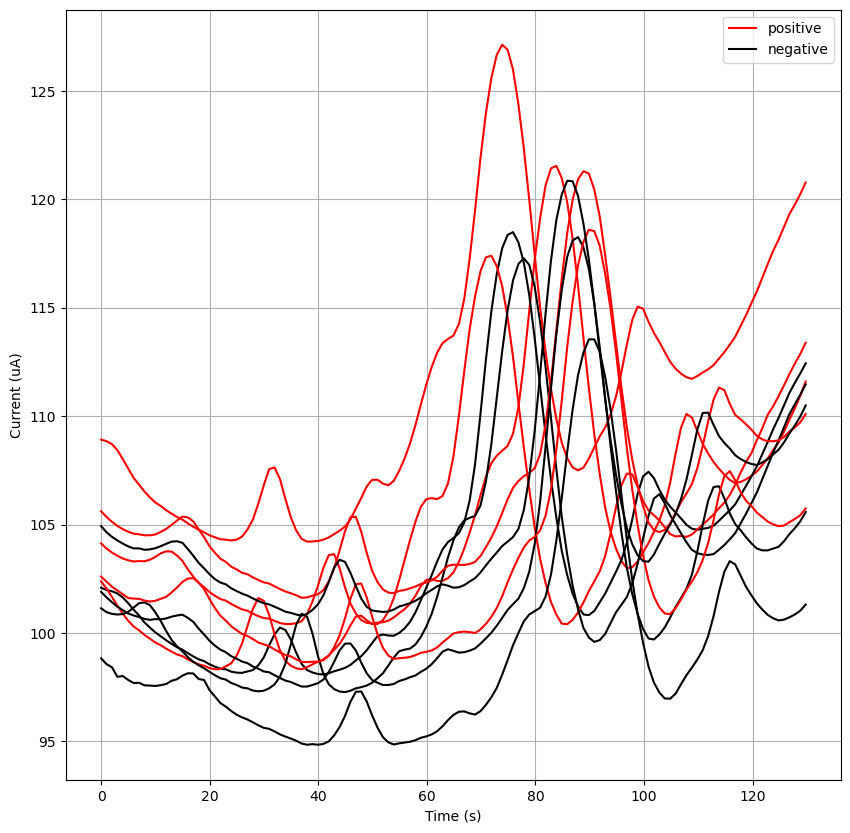

In [264]:
# Plotando as curvas em função do tempo
# plotando todos os positivos como vermelho e todos os negativos em preto
# PBS_Tween
plt.figure(figsize=(10,10))
for i in range(positives_pbs_tween.shape[1]):
    positive = positives_pbs_tween.iloc[:,i]
    negative = negatives_pbs_tween.iloc[:,i]
    if (i == 0 ):
        plt.plot(t, positive, color = 'r', label = 'positive')
        plt.plot(t, negative, color = 'black', label = 'negative')
    else:
        plt.plot(t, positive, color = 'r')
        plt.plot(t, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.show()

# Corrigindo aplicando a normalização pela base

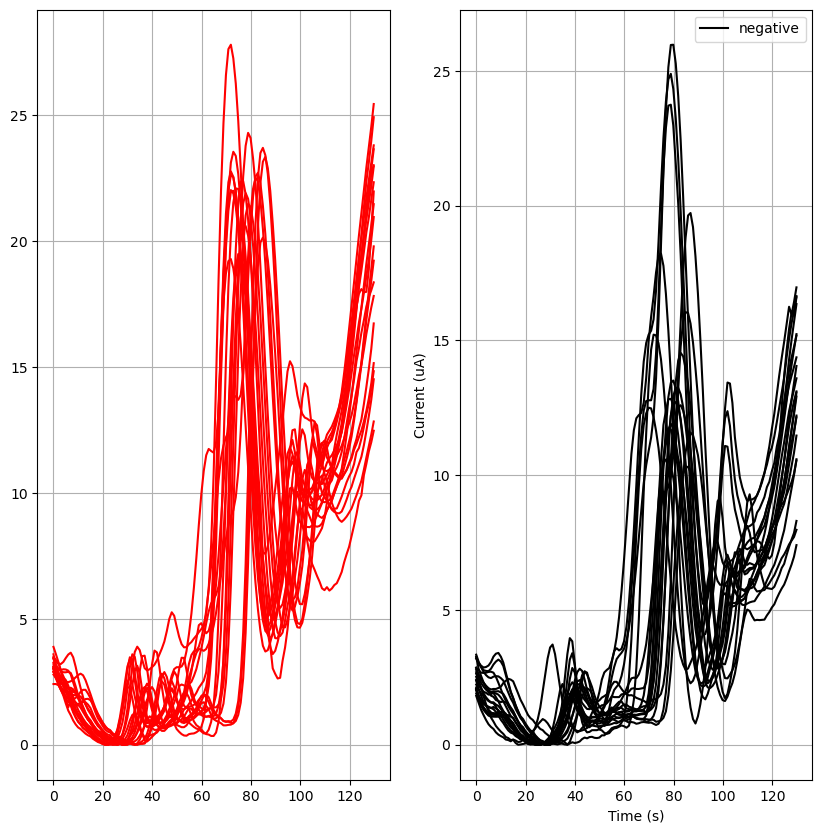

In [265]:
norm_neg_pbsx = negatives_pbsx.values
norm_neg_pbsx = (norm_neg_pbsx - np.min(norm_neg_pbsx, axis=0)) #/ (np.max(norm_neg_pbsx, axis=0) - np.min(norm_neg_pbsx, axis=0))

norm_pos_pbsx = positives_pbsx.values
norm_pos_pbsx = (norm_pos_pbsx - np.min(norm_pos_pbsx, axis=0)) #/ (np.max(norm_pos_pbsx, axis=0) - np.min(norm_pos_pbsx, axis=0))

# Plotando as curvas em função do tempo
# plotando todos os positivos como vermelho e todos os negativos em preto
fig, (ax0, ax1) = plt.subplots(figsize = (10,10), ncols=2, nrows=1)
for i in range(norm_neg_pbsx.shape[1]):
    positive = norm_pos_pbsx[:,i]
    negative = norm_neg_pbsx[:,i]
    if (i == 0 ):
        ax0.plot(t, positive, color = 'r', label = 'positive')
        ax1.plot(t, negative, color = 'black', label = 'negative')
    else:
        ax0.plot(t, positive, color = 'r')
        ax1.plot(t, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Time (s)')
plt.legend()
ax0.grid()
ax1.grid()
plt.show()


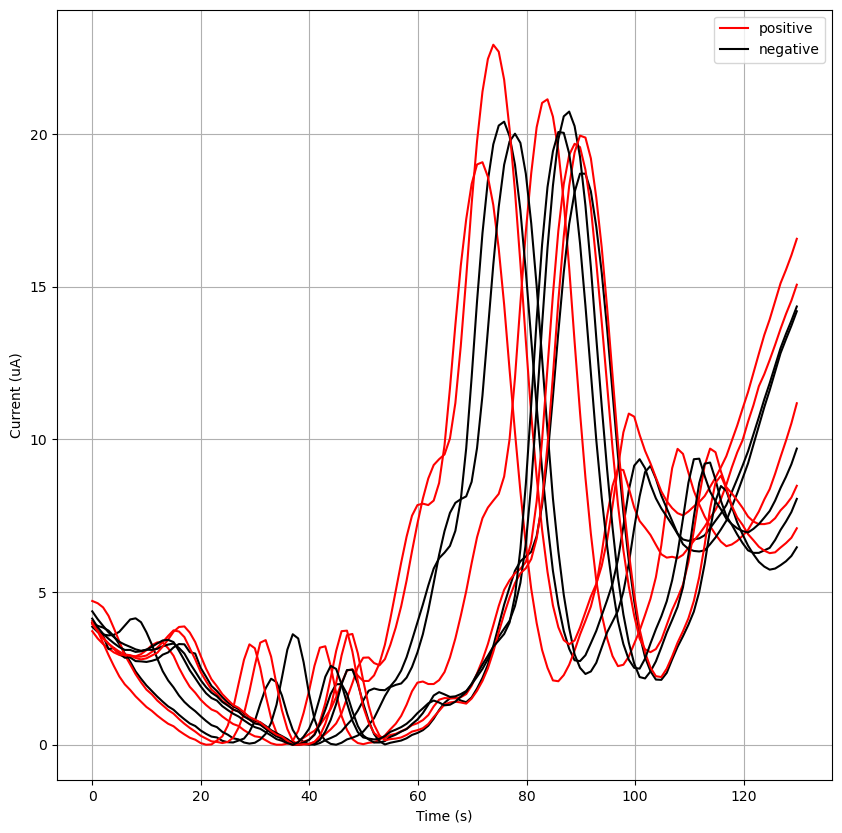

In [266]:
# PBS Tween
norm_neg_pbs_tween = negatives_pbs_tween.values
norm_neg_pbs_tween = (norm_neg_pbs_tween - np.min(norm_neg_pbs_tween, axis=0))# / #(np.max(norm_neg_pbs_tween, axis=0) - np.min(norm_neg_pbs_tween, axis=0))

norm_pos_pbs_tween = positives_pbs_tween.values
norm_pos_pbs_tween = (norm_pos_pbs_tween - np.min(norm_pos_pbs_tween, axis=0)) #/ #(np.max(norm_pos_pbs_tween, axis=0) - np.min(norm_pos_pbs_tween, axis=0))

# Plotando as curvas em função do tempo
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(norm_pos_pbs_tween.shape[1]):
    positive = norm_pos_pbs_tween[:,i]
    negative = norm_neg_pbs_tween[:,i]
    if (i == 0 ):
        plt.plot(t, positive, color = 'r', label = 'positive')
        plt.plot(t, negative, color = 'black', label = 'negative')
    else:
        plt.plot(t, positive, color = 'r')
        plt.plot(t, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.show()

# Observando os positivos e negativos quanto a área sob a curva

In [267]:
# PBSX
positive_areas_pbsx = np.trapz(norm_pos_pbsx, axis = 0)
negative_areas_pbsx = np.trapz(norm_neg_pbsx, axis = 0)
print(positive_areas_pbsx)
print(negative_areas_pbsx)

[ 678.5609   896.71277  995.06177  990.2809   852.0106   968.1775
  859.01105  747.0059   756.71826  892.4029   971.0908   823.4347
 1195.8679   804.0162   831.5406   955.7894   788.9917   899.425
  787.7502   666.7444 ]
[620.80725 860.1615  942.54596 944.5996  726.8015  500.24945 349.5208
 467.55948 418.3298  650.8288  574.6399  400.56006 507.4724  520.5908
 504.4143  486.9077  498.7707  569.07196 542.5514  492.38547]


In [268]:
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(positive_areas_pbsx, negative_areas_pbsx)
print( "Diferente" if p_value < 0.05 else "Iguais")

Diferente


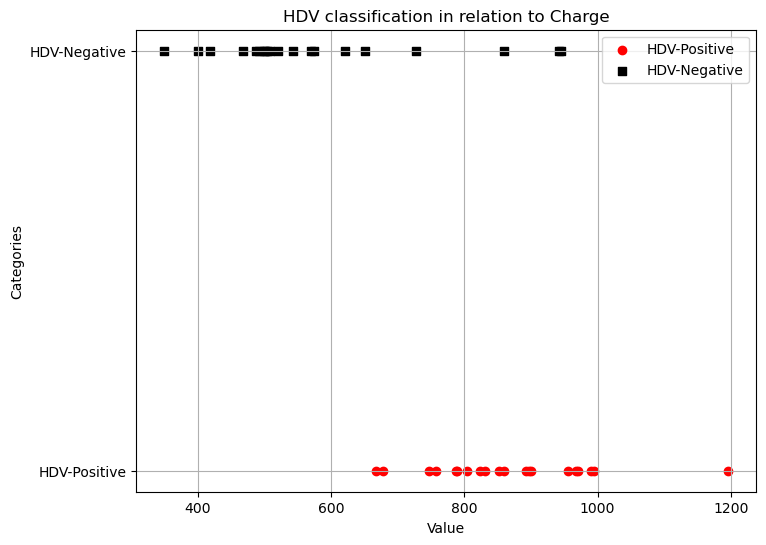

In [105]:
# Plotar os conjuntos de dados em um scatter plot com cores diferentes para cada conjunto
plt.figure(figsize=(8, 6))
plt.scatter(positive_areas_pbsx, [1]*len(positive_areas_pbsx), color='red', label='HDV-Positive', marker='o')
plt.scatter(negative_areas_pbsx, [2]*len(negative_areas_pbsx), color='black', label='HDV-Negative', marker='s')
plt.xlabel('Value')
plt.ylabel('Categories')
plt.yticks([1, 2], ['HDV-Positive', 'HDV-Negative'])
plt.title('HDV classification in relation to Charge')
plt.legend()
plt.grid(True)
plt.show()

In [269]:
# Avaliando em relação ao domínio da frequência
fft_positives = np.zeros(shape = (N, norm_pos_pbsx.shape[1]))
fft_negatives = np.zeros(shape = (N, norm_neg_pbsx.shape[1]))

for i in range(norm_pos_pbsx.shape[1]):
    fft_positives[:,i] = ((2/N) * np.abs(fft(norm_pos_pbsx[:,i])))
    fft_negatives[:,i] = ((2/N) * np.abs(fft(norm_neg_pbsx[:,i])))

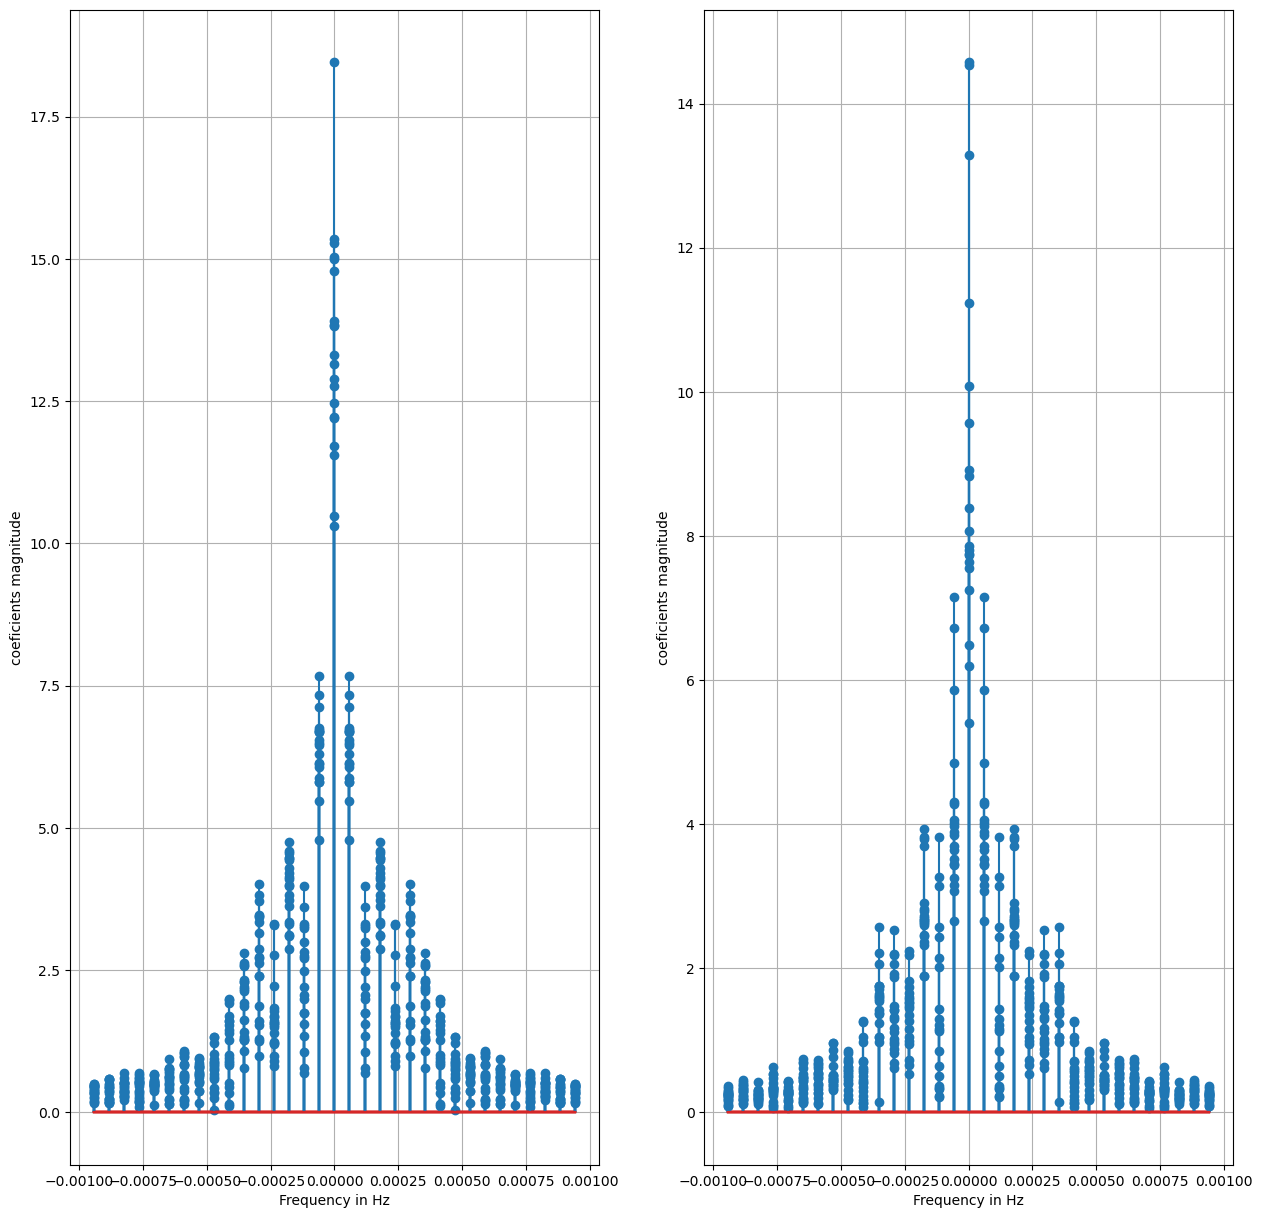

In [270]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,15))
for i in range(norm_pos_pbsx.shape[1]):
    freqs_pos = fftfreq(len(fft_positives[:,i]), T)
    freqs_neg = fftfreq(len(fft_negatives[:,i]), T)
    freqs_pos_aux = []
    freqs_neg_aux = []
    mag_pos = []
    mag_neg = []
    
    for (j,freq) in enumerate(freqs_pos):
        
        if (freq >= -0.001 and freq <= 0.001 ):
            freqs_neg_aux.append(freqs_neg[j])
            freqs_pos_aux.append(freqs_pos[j])
            mag_pos.append(fft_positives[j,i])
            mag_neg.append(fft_negatives[j,i])
            
    ax[0].stem(freqs_pos_aux, mag_pos,  use_line_collection=True)
    ax[1].stem(freqs_neg_aux, mag_neg, use_line_collection=True)
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel("Frequency in Hz")
ax[1].set_xlabel("Frequency in Hz")
ax[0].set_ylabel("coeficients magnitude")
ax[1].set_ylabel("coeficients magnitude")
plt.show()

In [271]:
pos_dc_values = fft_positives[0,:].transpose()
neg_dc_values = fft_negatives[0,:].transpose()

In [272]:
statistic, p_value = ttest_ind(pos_dc_values, neg_dc_values)
print( "Diferente" if p_value < 0.05 else "Iguais")

Diferente


In [307]:
def plot_classes(pos_values, neg_values, title = None):
    plt.figure(figsize=(8, 6))
    plt.scatter(pos_values, [1]*len(pos_values), color='red', label='HDV-Positive', marker='o')
    plt.scatter(neg_values, [2]*len(neg_values), color='black', label='HDV-Negative', marker='s')
    plt.xlabel('Value')
    plt.ylabel('Categories')
    plt.yticks([1, 2], ['HDV-Positive', 'HDV-Negative'])
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

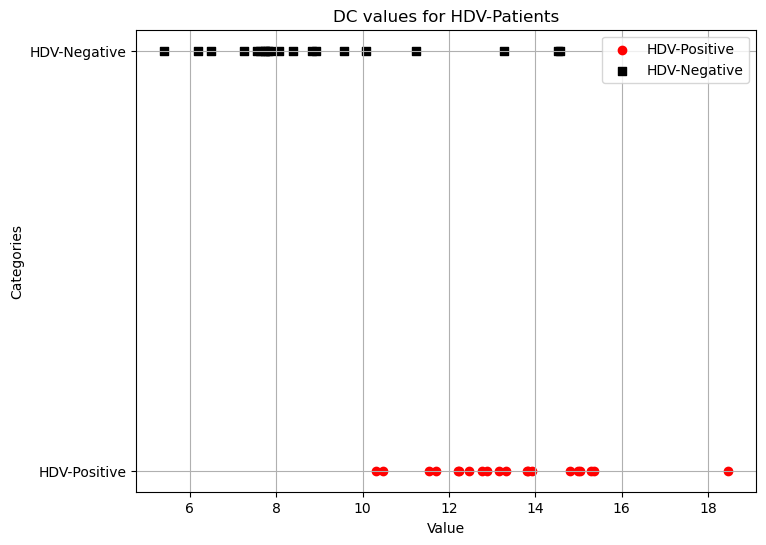

In [273]:
# Plotar os conjuntos de dados em um scatter plot com cores diferentes para cada conjunto
plt.figure(figsize=(8, 6))
plt.scatter(pos_dc_values, [1]*len(pos_dc_values), color='red', label='HDV-Positive', marker='o')
plt.scatter(neg_dc_values, [2]*len(neg_dc_values), color='black', label='HDV-Negative', marker='s')
plt.xlabel('Value')
plt.ylabel('Categories')
plt.yticks([1, 2], ['HDV-Positive', 'HDV-Negative'])
plt.title('DC values for HDV-Patients')
plt.legend()
plt.grid(True)
plt.show()

# Retirando Diversas Features dos dados

In [274]:
from scipy.stats import median_abs_deviation, skew, kurtosis
from collections import Counter

def calc_signal_energy(x):
    rows, cols = x.shape
    energies = np.zeros(shape = (cols,), dtype=np.float32)
    
    for c in range(cols):
        sum = 0.
        for i in range(rows):
            v = x[i,c]
            sum += v * v
        sum = sum / rows
        energies[c] = sum
    return energies

def entropy(signal):
    probabilities = np.array(list(Counter(signal).values())) / len(signal)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calc_entropy(_array):
    rows, cols = _array.shape
    entropies = np.zeros(shape = (cols,), dtype = np.float32)
    
    for i in range(cols):
        entropies[i] = entropy(_array[:,i])
    
    return entropies

In [275]:
# Extração de features baseada no domínio do tempo
positives_mean = norm_pos_pbsx.mean(axis=0)
positives_std = norm_pos_pbsx.std(axis = 0)
positives_mad = median_abs_deviation(norm_pos_pbsx, axis = 0)
positives_max = norm_pos_pbsx.max(axis = 0)
positives_min = norm_pos_pbsx.min(axis = 0)
positives_energy = calc_signal_energy(norm_pos_pbsx)
positives_iqr = np.percentile(norm_pos_pbsx, 75, axis = 0) - np.percentile(norm_pos_pbsx, 25, axis = 0)
positive_entropy = calc_entropy(norm_pos_pbsx)
freq_pos_mean = fft_positives.mean(axis = 0)
positive_skewness = skew(fft_positives, axis=0, bias=True)
positive_kurtosis = kurtosis(fft_positives, axis=0, bias=True)


negatives_mean = norm_neg_pbsx.mean(axis = 0)
negatives_std = norm_neg_pbsx.std(axis = 0)
negatives_mad = median_abs_deviation(norm_neg_pbsx, axis = 0)
negatives_max = norm_neg_pbsx.max(axis = 0)
negatives_min = norm_neg_pbsx.min(axis = 0)
negatives_energy = calc_signal_energy(norm_neg_pbsx)
negatives_iqr = np.percentile(norm_neg_pbsx, 75, axis = 0) - np.percentile(norm_neg_pbsx, 25, axis = 0)
negative_entropy = calc_entropy(norm_neg_pbsx)
freq_neg_mean = fft_negatives.mean(axis = 0)
negative_skewness = skew(fft_negatives, axis=0, bias=True)
negative_kurtosis = kurtosis(fft_negatives, axis=0, bias=True)



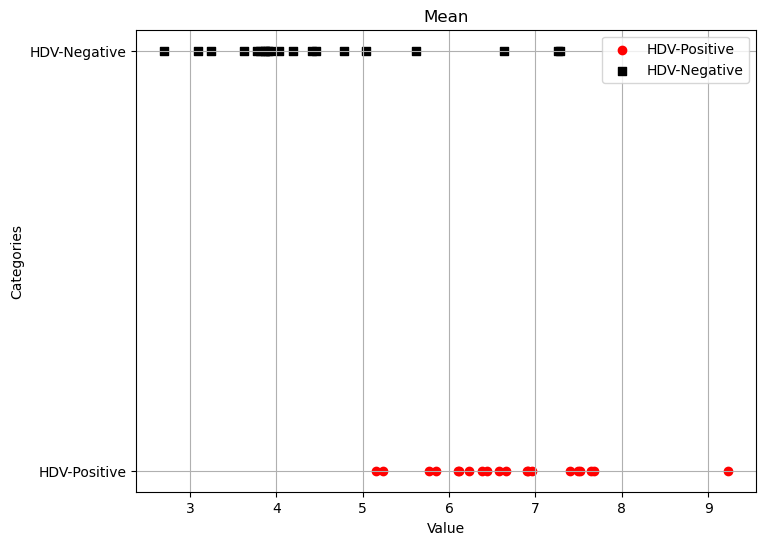

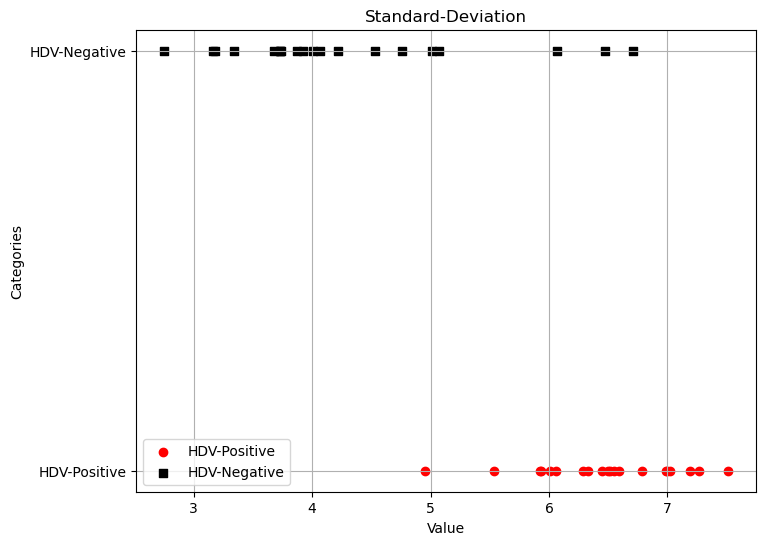

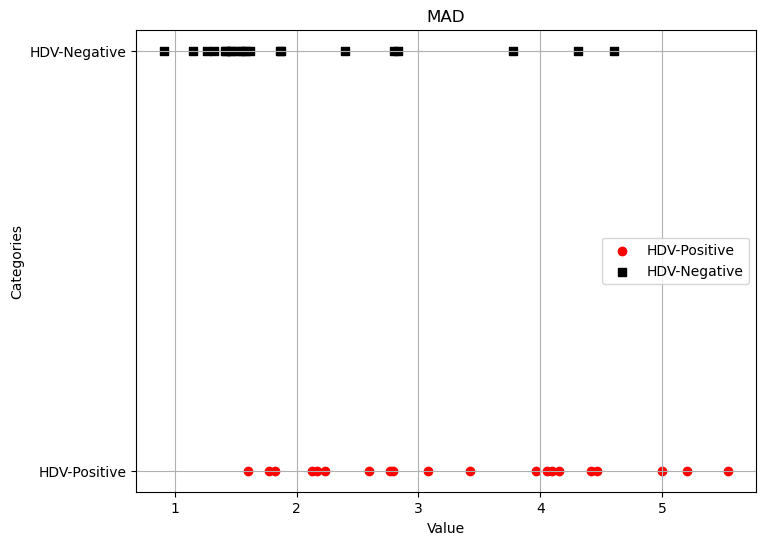

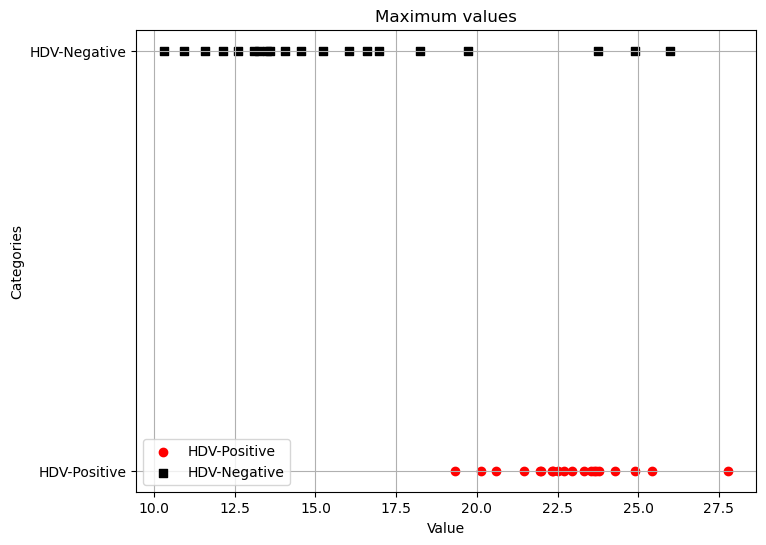

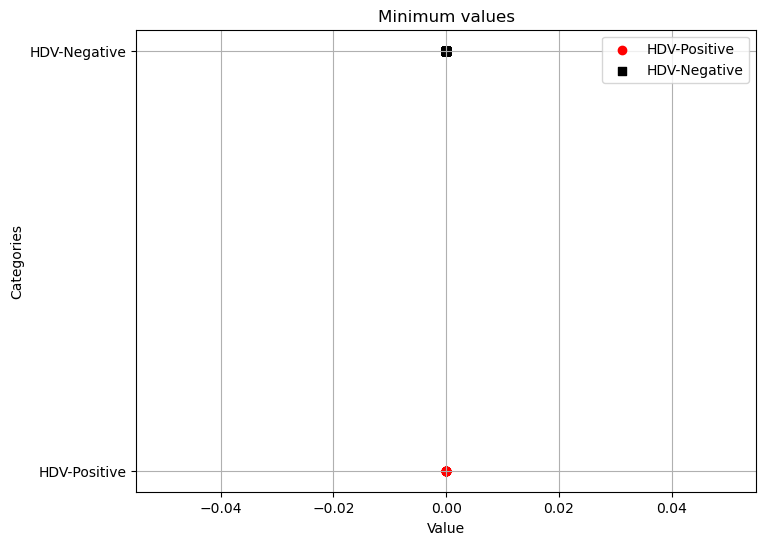

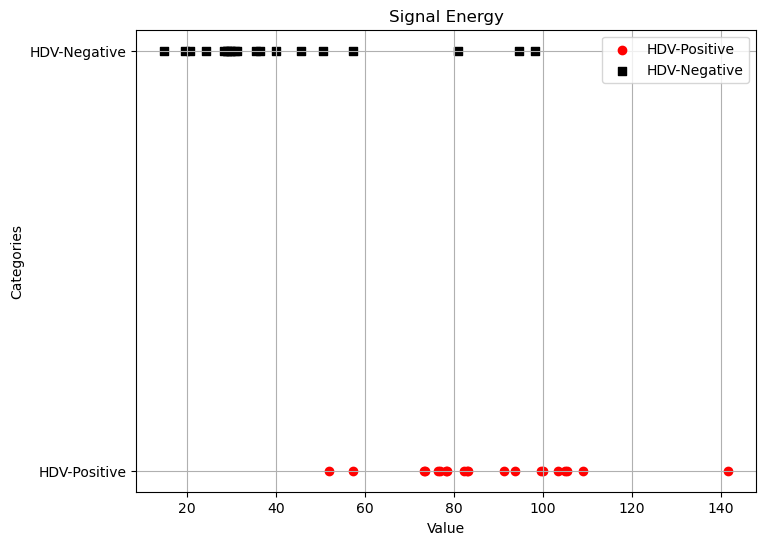

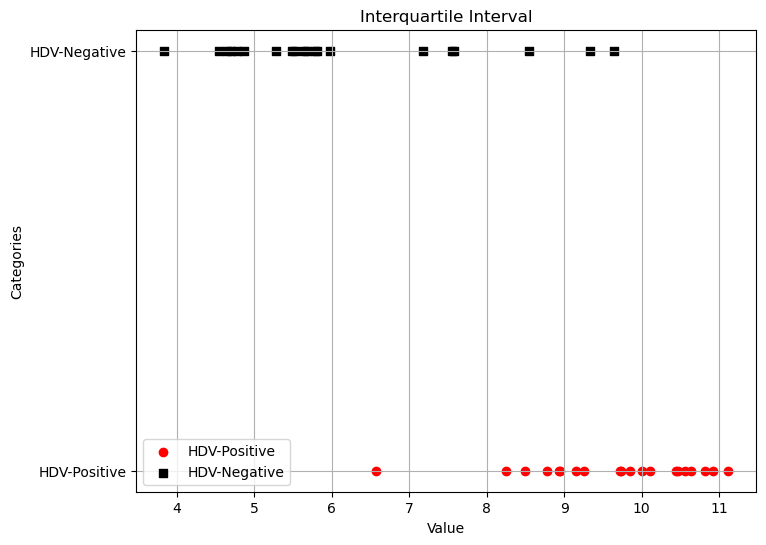

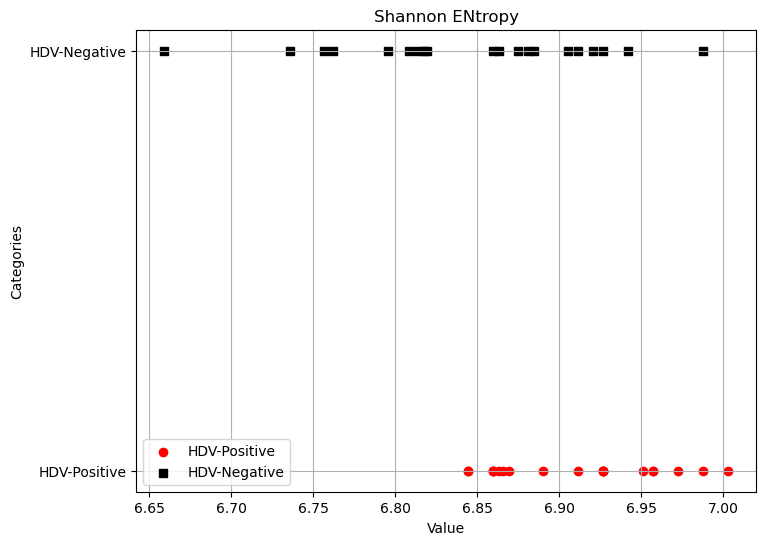

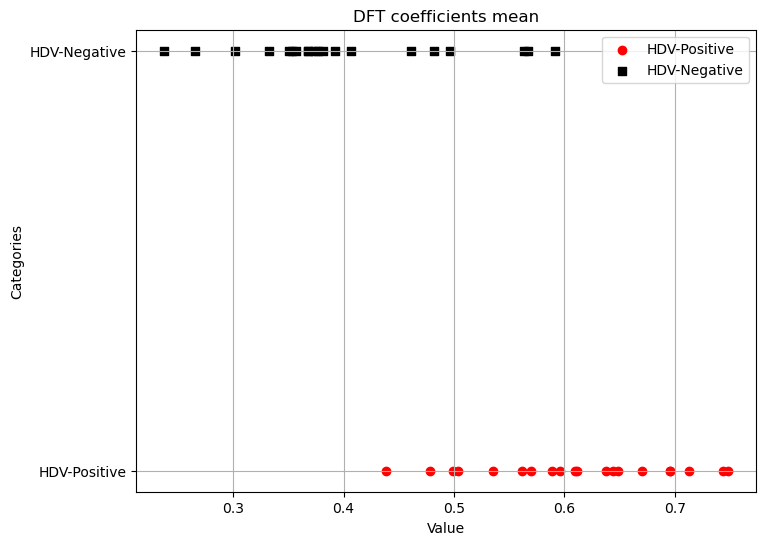

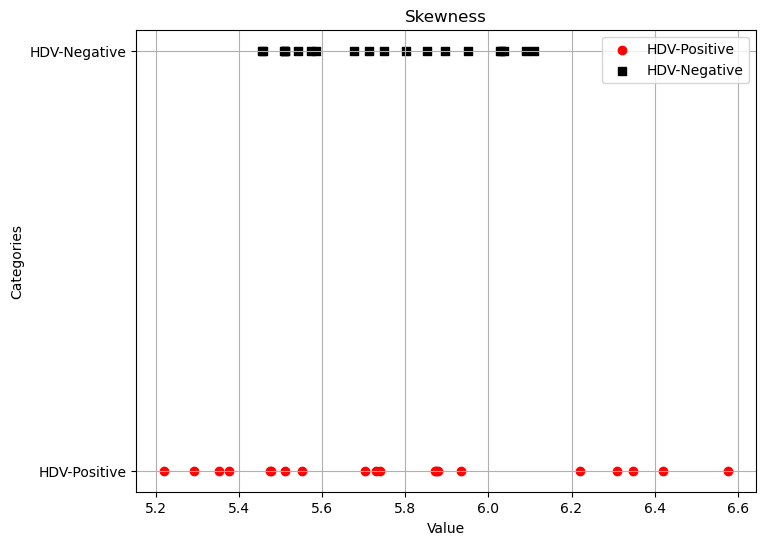

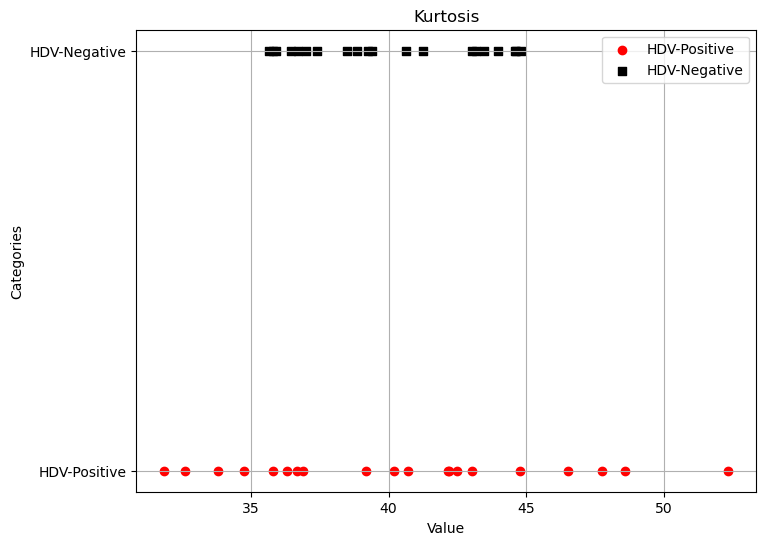

In [310]:
plot_classes(positives_mean, negatives_mean, "Mean")
plot_classes(positives_std, negatives_std, "Standard-Deviation")
plot_classes(positives_mad, negatives_mad, "MAD")
plot_classes(positives_max, negatives_max, "Maximum values")
plot_classes(positives_min, negatives_min, "Minimum values")
plot_classes(positives_energy, negatives_energy, "Signal Energy")
plot_classes(positives_iqr, negatives_iqr, "Interquartile Interval")
plot_classes(positive_entropy, negative_entropy, "Shannon ENtropy")
plot_classes(freq_pos_mean, freq_neg_mean, "DFT coefficients mean")
plot_classes(positive_skewness, negative_skewness, "Skewness")
plot_classes(positive_kurtosis, negative_kurtosis, "Kurtosis")


In [289]:
positive_labels = np.ones(shape = (20,))
positive_hdv_features = [positives_mean, positives_std, positives_mad, positives_max, positives_min, positives_energy, positives_iqr, positive_entropy, freq_pos_mean, positive_kurtosis, positive_skewness, np.array(positive_areas_pbsx), pos_dc_values, positive_labels]
concatenate_array_positive = np.column_stack(positive_hdv_features)
print(concatenate_array_positive.shape)


(20, 14)


In [291]:
negative_labels = np.zeros(shape = (20,))
negative_hdv_features = [negatives_mean, negatives_std, negatives_mad, negatives_max, negatives_min, negatives_energy, negatives_iqr, negative_entropy, freq_neg_mean, negative_kurtosis, negative_skewness, np.array(negative_areas_pbsx), neg_dc_values, negative_labels]
concatenate_array_negative = np.column_stack(negative_hdv_features)
print(concatenate_array_negative.shape)

(20, 14)


In [295]:
# Criando o dataset de pacientes com hepatite
columns = ['time_mean', 'time_std', 'time_mad', 'time_max', 'time_min', 'energy', 'iqr', 'entropy', 'dft_mean', 'kurtosis', 'skewness', 'time_area', 'dc', 'target']
hepatitis_dataframe = pd.concat([pd.DataFrame(concatenate_array_negative, columns=columns), pd.DataFrame(concatenate_array_positive, columns=columns)], axis=0, ignore_index=True)
hepatitis_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time_mean  40 non-null     float64
 1   time_std   40 non-null     float64
 2   time_mad   40 non-null     float64
 3   time_max   40 non-null     float64
 4   time_min   40 non-null     float64
 5   energy     40 non-null     float64
 6   iqr        40 non-null     float64
 7   entropy    40 non-null     float64
 8   dft_mean   40 non-null     float64
 9   kurtosis   40 non-null     float64
 10  skewness   40 non-null     float64
 11  time_area  40 non-null     float64
 12  dc         40 non-null     float64
 13  target     40 non-null     float64
dtypes: float64(14)
memory usage: 4.5 KB


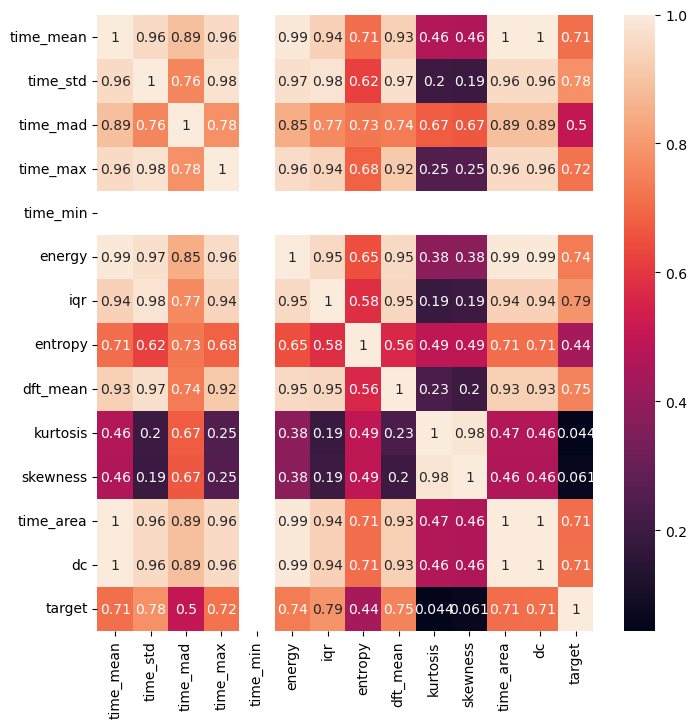

In [300]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
ax = snb.heatmap(hepatitis_dataframe.corr(), annot=True)
plt.show()

In [301]:
hepatitis_dataframe.to_csv('..\data\hepatitis.csv')

array([[<AxesSubplot:title={'center':'time_mean'}>,
        <AxesSubplot:title={'center':'time_std'}>,
        <AxesSubplot:title={'center':'time_mad'}>,
        <AxesSubplot:title={'center':'time_max'}>],
       [<AxesSubplot:title={'center':'time_min'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'iqr'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'dft_mean'}>,
        <AxesSubplot:title={'center':'kurtosis'}>,
        <AxesSubplot:title={'center':'skewness'}>,
        <AxesSubplot:title={'center':'time_area'}>],
       [<AxesSubplot:title={'center':'dc'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1000x1000 with 0 Axes>

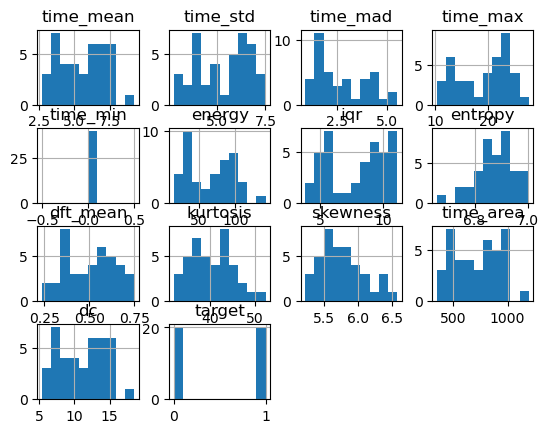

# Avaliando em relação ao domínio da frequência para o PBS Tween
fft_positives = np.zeros(shape = (N, norm_pos_pbs_tween.shape[1]))
fft_negatives = np.zeros(shape = (N, norm_neg_pbs_tween.shape[1]))

for i in range(norm_pos_pbsx.shape[1]):
    fft_positives[:,i] = ((2/N) * np.abs(fft(norm_pos_pbs_tween[:,i])))
    fft_negatives[:,i] = ((2/N) * np.abs(fft(norm_neg_pbs_tween[:,i])))

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,10))
for i in range(norm_pos_pbsx.shape[1]):
    freqs_pos = fftfreq(len(fft_positives[:,i]), T)
    freqs_neg = fftfreq(len(fft_negatives[:,i]), T)
    ax[0].plot(freqs_pos, fft_positives[:,i], color = 'r')
    ax[1].plot(freqs_neg, fft_negatives[:,i], color = 'black')
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel("Frequency in Hz")
ax[1].set_xlabel("Frequency in Hz")
ax[0].set_ylabel("coeficients absolute value")
ax[1].set_ylabel("coefficients absolute value")
plt.show()

In [179]:
# PBS_Tween 
positive_areas_pbs_tween = np.trapz(norm_pos_pbs_tween, axis = 0)
negative_areas_pbs_tween = np.trapz(norm_neg_pbs_tween, axis = 0)
print(positive_areas_pbs_tween)
print(negative_areas_pbs_tween)

[19.76794  27.340298 29.107317 17.745388 16.682426]
[25.628561 22.700182 16.290306 16.857948 17.43322 ]


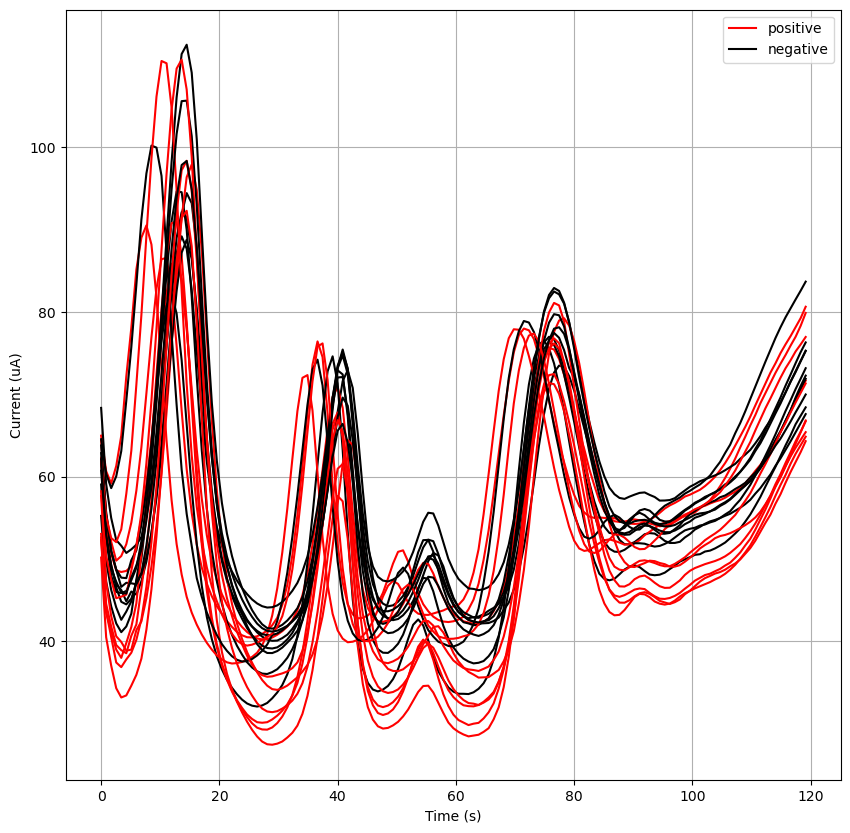

In [180]:
# Plotando as curvas em função do tempo
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(t, positive, color = 'r', label = 'positive')
        plt.plot(t, negative, color = 'black', label = 'negative')
    else:
        plt.plot(t, positive, color = 'r')
        plt.plot(t, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.show()

In [181]:
fft_positives = np.zeros(shape = (N, positives_df.shape[1]))
fft_negatives = np.zeros(shape = (N, negatives_df.shape[1]))

for i in range(positives_df.shape[1]):
    fft_positives[:,i] = ((2.0/N) * np.abs(fft(positives_df.values[:,i])))
    fft_negatives[:,i] = ((2.0/N) * np.abs(fft(negatives_df.values[:,i])))

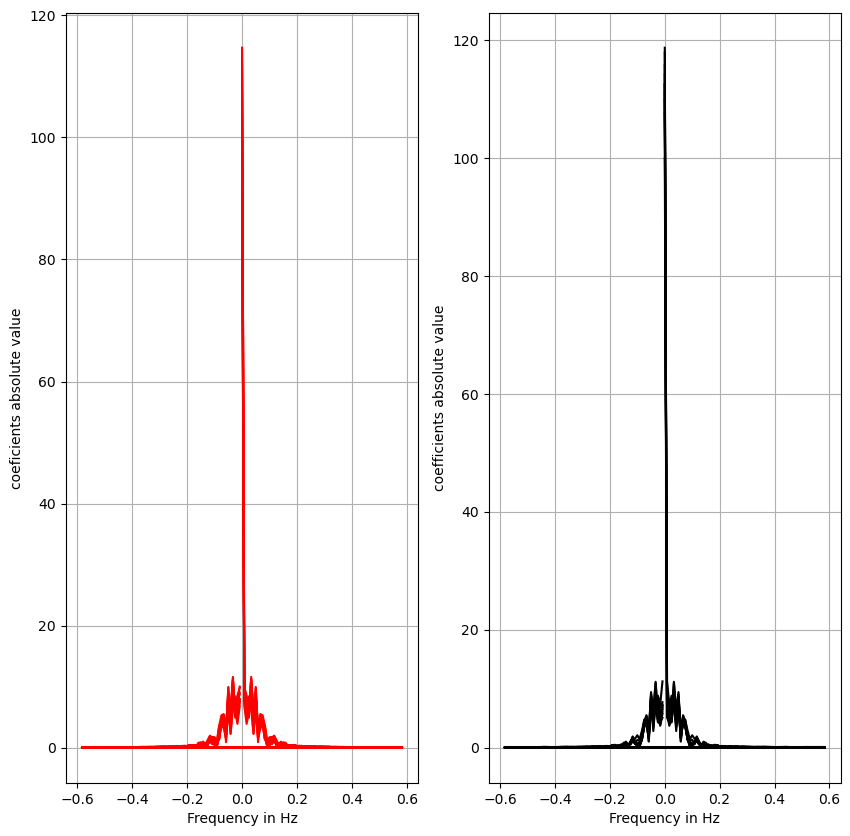

In [184]:

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,10))
for i in range(positives_df.shape[1]):
    freqs_pos = fftfreq(len(fft_positives[:,i]), T)
    freqs_neg = fftfreq(len(fft_negatives[:,i]), T)
    ax[0].plot(freqs_pos, fft_positives[:,i], color = 'r')
    ax[1].plot(freqs_neg, fft_negatives[:,i], color = 'black')
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel("Frequency in Hz")
ax[1].set_xlabel("Frequency in Hz")
ax[0].set_ylabel("coeficients absolute value")
ax[1].set_ylabel("coefficients absolute value")
plt.show()

In [24]:
import Hep.inference_hep as inf
import os
import json

hep = inf.Hep()
filepath = "C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\JSON\\Hep"
files = os.listdir(filepath)
#fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,10))
neg_index = 0
pos_index = 0
error = 0
error_fourier = 0
for j, file in enumerate(files):
    
    if ('.json' in file):
        print(file)
        json_ = (hep.getJsonFromFile(os.path.join(filepath, file)))
        json_readings = json_["readings"]
        potential = []
        current = []
        current_original = []
        
        if ('pos' in file):
            original = positives_df.values[:,pos_index]
            fourier_original = 2.0/N * np.abs(fft(original)[0:N//2])
            pos_index += 1
        elif ('neg' in file):
            original = negatives_df.values[:,neg_index]
            fourier_original = 2.0/N * np.abs(fft(original)[0:N//2])
            neg_index += 1
        
        for i in range(len(json_readings)):
            sample = json.loads(json_readings[i])
            v = np.float32(sample["V"])
            c = np.float32(sample["I"])
            o = original[i]
            potential.append(v)
            current.append(c)
            current_original.append(o)
            
            if (abs(o - c) > 0.000001):
                error += 1
                
        current_numpy = np.array(current)
        print(hep.predict_data(current_numpy))

        # Comparando os coeficientes da fft de ambas as funções
        fourier = fft(current_numpy)
        fourier = 2.0/N * abs(fourier[0:N//2])
        fourier_o = hep.transformFourier(np.array(current_original))
        
        for i in range(len(fourier)):
            fj = fourier[i]
            fo = fourier_original[i]
            foo = fourier_o[i]
            
            #print(fj, fo, foo)
            if (abs(fo - fj) > 0.00001):
                error_fourier += 1
                
print(error)
print(error_fourier)
            
            
        #if ('pos' in file):
            #ax[0].plot(hep.transformFourier(current), color = 'r')
       # elif ('neg' in file):
            #ax[1].plot(hep.transformFourier(current), color = 'black')
#ax[0].grid()
#ax[1].grid()
#plt.show()

neg_0.json
                0
count   70.000000
mean     2.387737
std     13.159870
min      0.005693
25%      0.036582
50%      0.083844
75%      0.333509
max    109.881546
Features
[2.3877367973327637, 13.159870147705078, 0.005693345796316862, 0.036581793799996376, 0.0838438831269741, 0.33350908756256104, 109.88154602050781]
Result: 0
0
neg_1.json
                0
count   70.000000
mean     2.377383
std     12.012026
min      0.042012
25%      0.078390
50%      0.117763
75%      0.647267
max    100.000191
Features
[2.377382516860962, 12.012025833129883, 0.04201195389032364, 0.07839039340615273, 0.1177629604935646, 0.6472669169306755, 100.00019073486328]
Result: 0
0
neg_2.json
                0
count   70.000000
mean     2.516692
std     12.921431
min      0.045679
25%      0.079435
50%      0.148204
75%      0.540861
max    107.682762
Features
[2.5166919231414795, 12.921430587768555, 0.045679397881031036, 0.07943542301654816, 0.14820391684770584, 0.5408614948391914, 107.6827621459961

In [107]:
positive_fft_df = pd.DataFrame(fft_positives)
negatives_fft_df = pd.DataFrame(fft_negatives)

In [108]:
describe_positives = positive_fft_df.describe()
describe_positives

,0,1,2,3,4,5,6,7,8,9
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2.551973,2.382556,2.559735,2.323185,2.370625,2.474154,2.383860,2.486415,2.749640,2.654859
std,13.723578,13.249914,13.412711,11.469501,11.429008,12.394699,11.132262,11.990562,13.728072,12.935666
min,0.007828,0.019801,0.063253,0.032374,0.029868,0.003622,0.044960,0.049060,0.060662,0.038032
25%,0.101355,0.059888,0.113382,0.071956,0.073661,0.052156,0.080257,0.094055,0.094247,0.084881
50%,0.152781,0.106937,0.138446,0.123592,0.128185,0.130392,0.154984,0.140155,0.144433,0.140481
75%,0.698019,0.511137,0.390712,0.564222,0.547430,0.491138,0.453622,0.394946,0.651985,0.432501
max,114.697182,110.741188,111.911415,95.373878,94.872978,102.978027,92.075294,99.365746,114.241943,107.315781


In [109]:
describe_negatives = negatives_fft_df.describe()
describe_negatives

,0,1,2,3,4,5,6,7,8,9
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2.387736,2.377383,2.516692,2.473245,2.487154,2.378817,2.751527,2.710337,2.670486,2.466382
std,13.159870,12.012028,12.921432,14.196111,13.471023,13.302743,13.895236,14.155727,13.721335,13.484075
min,0.005693,0.042012,0.045679,0.005128,0.044800,0.009016,0.098216,0.049222,0.027468,0.029250
25%,0.036582,0.078390,0.079435,0.039721,0.088341,0.038756,0.135793,0.073319,0.048947,0.044332
50%,0.083844,0.117763,0.148204,0.090610,0.160346,0.094037,0.185317,0.110715,0.103657,0.107939
75%,0.333509,0.647267,0.540861,0.462593,0.401028,0.421710,0.561364,0.331576,0.430077,0.307257
max,109.881546,100.000191,107.682762,118.697556,112.475105,111.140205,115.745911,117.884552,114.193893,112.499893


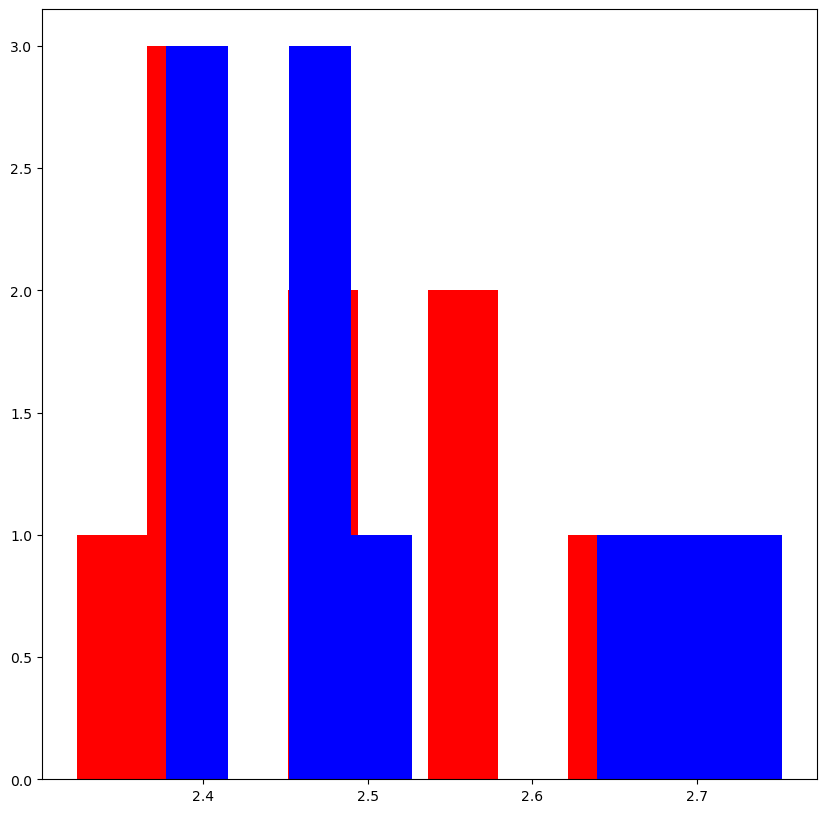

In [110]:
# Plotando as médias dos coeficientes
fig = plt.figure(figsize=(10,10))
plt.hist(describe_positives.iloc[1,:], color='r')
plt.hist(describe_negatives.iloc[1,:], color='b')
plt.show()

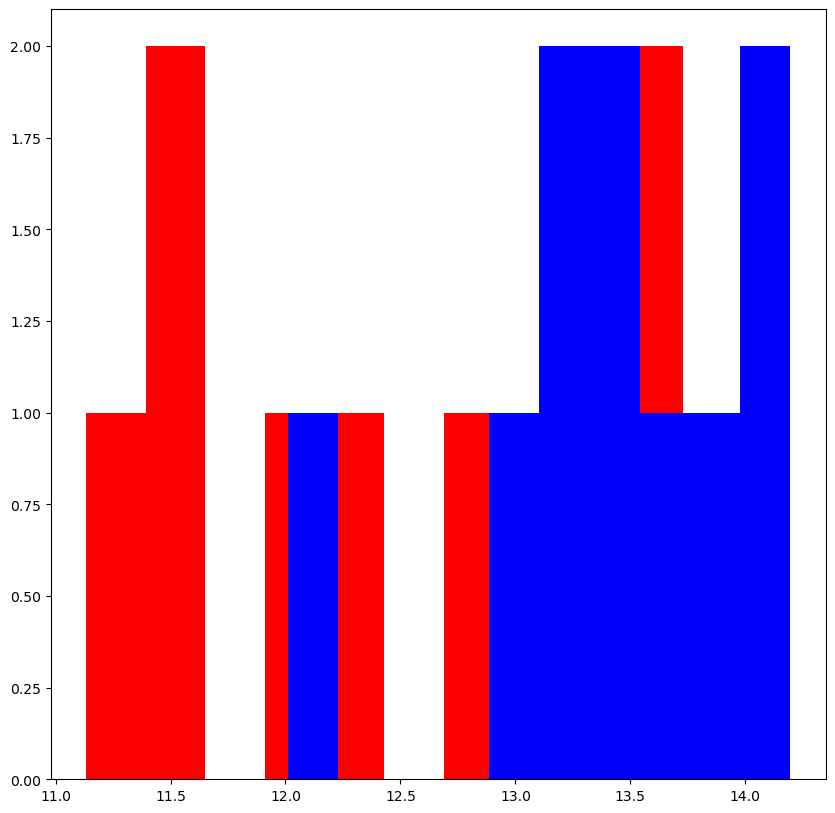

In [111]:
# Plotando o valor mínimo
fig = plt.figure(figsize=(10,10))
plt.hist(describe_positives.iloc[2,:], color='r')
plt.hist(describe_negatives.iloc[2,:], color='b')
plt.show()

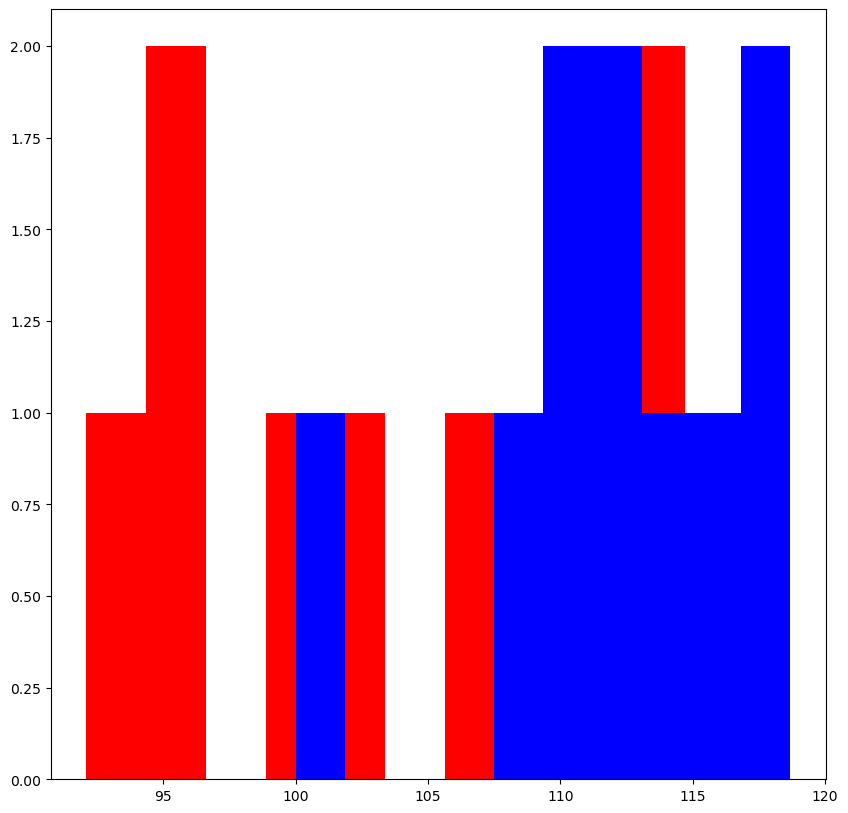

In [112]:
# Plotando o valor máximo
fig = plt.figure(figsize=(10,10))
plt.hist(describe_positives.iloc[-1,:], color='r')
plt.hist(describe_negatives.iloc[-1,:], color='b')
plt.show()

In [113]:
hepatitis = pd.concat([describe_negatives.transpose(), describe_positives.transpose()], axis=0)
y_negative = np.zeros(shape = (describe_negatives.shape[1],), dtype=int)
y_positive = np.ones(shape = (describe_positives.shape[1],), dtype=int)
labels = np.concatenate((y_negative, y_positive), axis = 0)
hepatitis['label'] = labels
hepatitis.drop(['count'], axis=1, inplace=True)


In [114]:
hepatitis.head()

,mean,std,min,25%,50%,75%,max,label
0,2.387736,13.159870,0.005693,0.036582,0.083844,0.333509,109.881546,0
1,2.377383,12.012028,0.042012,0.078390,0.117763,0.647267,100.000191,0
2,2.516692,12.921432,0.045679,0.079435,0.148204,0.540861,107.682762,0
3,2.473245,14.196111,0.005128,0.039721,0.090610,0.462593,118.697556,0
4,2.487154,13.471023,0.044800,0.088341,0.160346,0.401028,112.475105,0


<AxesSubplot:>

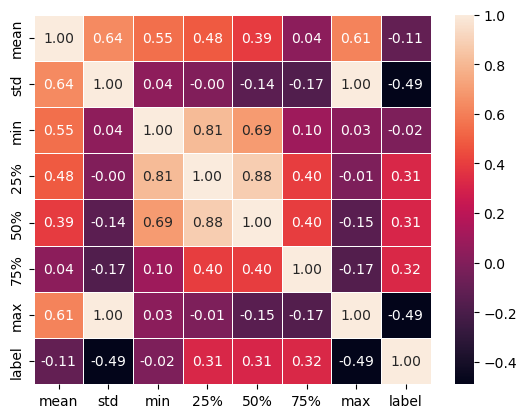

In [115]:
# Importando a Matriz de correlação
import seaborn as sn
correlations = hepatitis.corr()
sn.heatmap(correlations, annot=True, fmt='.2f', linewidths=.6)

In [116]:
hepatitis.to_csv('C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\hepatite_fourier.csv')

In [18]:
# Trazendo para a linha de base
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    min_p = positive.min()
    min_n = negative.min()
    positives_df.iloc[:,i] = (positive - min_p)
    negatives_df.iloc[:,i] = (negative - min_n)

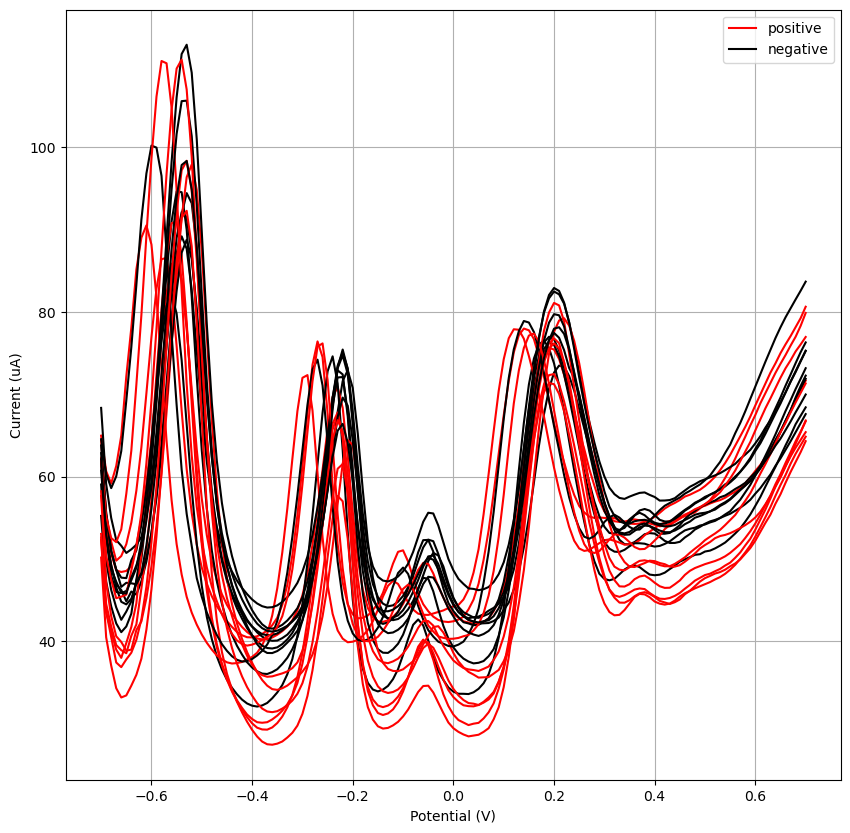

In [18]:
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_df, positive, color = 'r', label = 'positive')
        plt.plot(potential_df, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_df, positive, color = 'r')
        plt.plot(potential_df, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

In [19]:
# Aplicando min max normalization
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    max_p = positive.max()
    min_p = positive.min()
    max_n = negative.max()
    min_n = negative.min()
    positives_df.iloc[:,i] = (positive - min_p) / (max_p - min_p)
    negatives_df.iloc[:,i] = (negative - min_n) / (max_n - min_n)

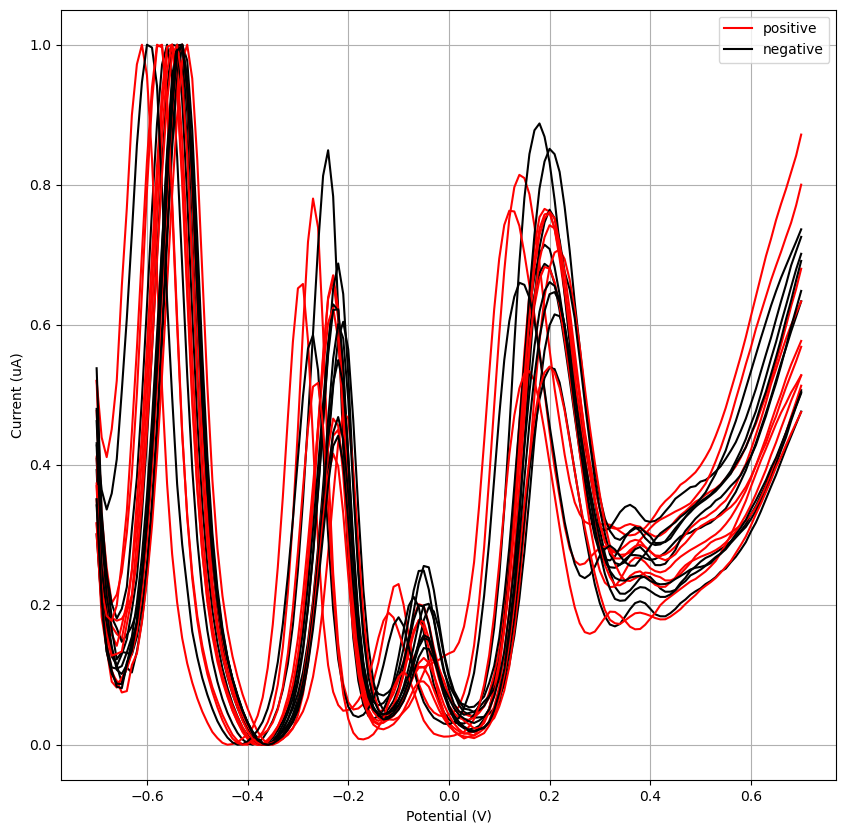

In [20]:
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_df, positive, color = 'r', label = 'positive')
        plt.plot(potential_df, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_df, positive, color = 'r')
        plt.plot(potential_df, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

In [21]:
# Positive = 1
# Negative = 0

Y = np.concatenate((np.zeros(shape = (1, negatives_df.shape[1])), np.ones(shape = (1, positives_df.shape[1]))), axis = 1)
#Y = np.concatenate((np.zeros(shape = (1, currents_virgin.shape[1])), np.ones(shape = (1, currents_rhodamine.shape[1])), np.zeros(shape = (1, emstat_currents_virgin.shape[1])), np.ones(shape = (1, emstat_currents_rhodamine.shape[1]))), axis = 1)
Y = Y.transpose()
Y.shape

(20, 1)

In [22]:
X = np.concatenate((negatives_df, positives_df), axis = 1)
X = X.transpose()
X.shape

(20, 141)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13, 141)
(13, 1)
(7, 141)
(7, 1)


In [24]:
model = tf.keras.Sequential()

# First convolutional layer
model.add(tf.keras.layers.Conv1D(activation='relu', input_shape = (141, 1), kernel_size=15, filters=8, padding='causal'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
# Second convolutional layer
#model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=7, activation='relu'))
#model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

# Flatten layer to transition from convolutional layers to dense layers
model.add(tf.keras.layers.Flatten())

# Fully connected layers
#model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 141, 8)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 70, 8)             0         
_________________________________________________________________
dropout (Dropout)            (None, 70, 8)             0         
_________________________________________________________________
flatten (Flatten)            (None, 560)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                35904     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
____________________________

In [25]:
model_checkpoint_path = ''
if (isLinux()):
    pass
else:
    model_checkpoint_path = 'C:\\Users\\pveso\\Documents\\heart_attack_analysis\\src\\Hep'
callback = tf.keras.callbacks.ModelCheckpoint(model_checkpoint_path, monitor='val_acc', save_best_only=True, save_weights_only=True, verbose=1, mode = 'max')

In [26]:
# Reshape the data to fit the 1D CNN input shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
batch_size = 1
epochs = 500

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, callbacks = [callback])

Train on 13 samples, validate on 7 samples
Epoch 1/500
 1/13 [=>............................] - ETA: 2s - loss: 0.7010 - acc: 0.0000e+00
Epoch 00001: val_acc improved from -inf to 0.57143, saving model to C:\Users\pveso\Documents\heart_attack_analysis\src\Hep
13/13 [==============================] - 0s 25ms/sample - loss: 0.7220 - acc: 0.3846 - val_loss: 0.6884 - val_acc: 0.5714
Epoch 2/500
 1/13 [=>............................] - ETA: 0s - loss: 0.7384 - acc: 0.0000e+00
Epoch 00002: val_acc did not improve from 0.57143
13/13 [==============================] - 0s 2ms/sample - loss: 0.6857 - acc: 0.5385 - val_loss: 0.6906 - val_acc: 0.5714
Epoch 3/500
 1/13 [=>............................] - ETA: 0s - loss: 0.6595 - acc: 1.0000
Epoch 00003: val_acc did not improve from 0.57143
13/13 [==============================] - 0s 2ms/sample - loss: 0.6870 - acc: 0.6154 - val_loss: 0.6943 - val_acc: 0.5714
Epoch 4/500
 1/13 [=>............................] - ETA: 0s - loss: 0.6476 - acc: 1.0000
Ep

In [27]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_accuracy = history.history['val_acc']

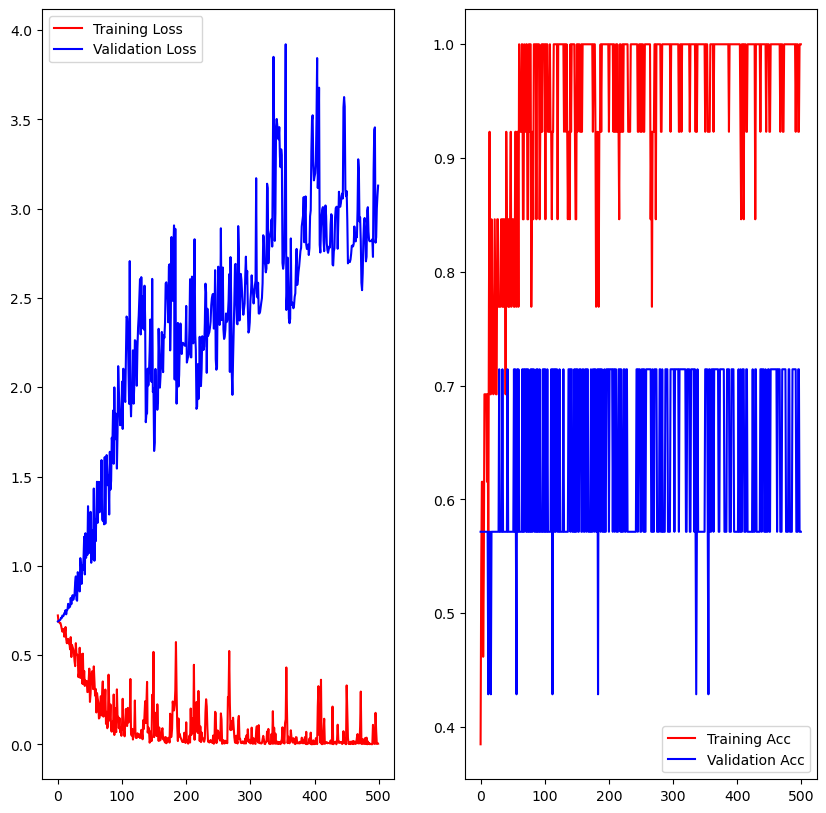

In [28]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (10,10))
ax0.plot(loss, color = 'r', label = 'Training Loss')
ax0.plot(val_loss, color = 'b', label = 'Validation Loss')
ax1.plot(acc, color = 'r', label = 'Training Acc')
ax1.plot(val_accuracy, color = 'b', label = 'Validation Acc')
ax1.legend()
ax0.legend()
plt.show()

In [29]:
# Matriz confusão
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay, roc_curve, auc
model.load_weights(model_checkpoint_path)
y_pred = model.predict(X_test)
y_pred = y_pred >= 0.5
cm = confusion_matrix(y_test, y_pred)

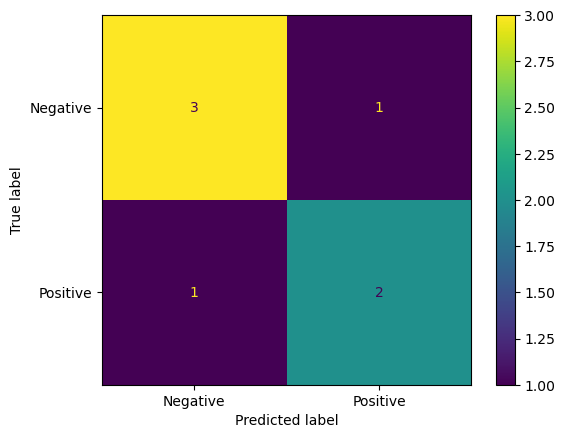

In [30]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive']).plot()

In [31]:
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.6666666666666666
0.7142857142857143


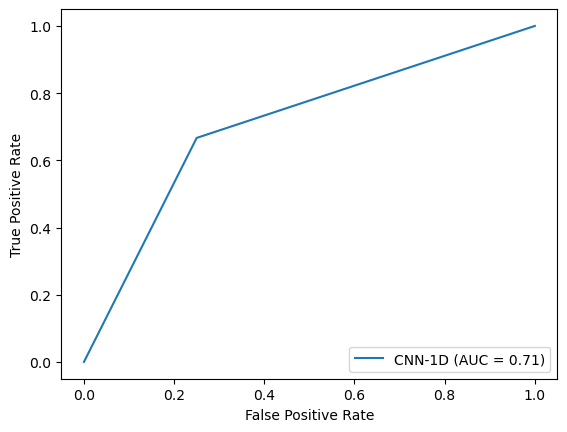

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='CNN-1D')
display.plot()
plt.show()